In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statistics
import numpy as np
import random
from random import shuffle
from scipy import stats
from sklearn.metrics import r2_score

In [38]:
import plotly.io as pio
pio.renderers.default = 'firefox'

In [143]:
df = pd.read_csv("dados_1.csv", delimiter=';')

In [144]:
df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               26.7   128.8          12.1   
1               Alagoinhas               26.7   128.8          12.1   
2               Alagoinhas               27.0   128.8          12.1   
3               Alagoinhas               25.6   128.8          12.1   
4               Alagoinhas               24.2   128.8          12.1   
...                    ...                ...     ...           ...   
6295  Vitória da Conquista               18.1   879.5          14.9   
6296  Vitória da Conquista               20.2   879.5          14.9   
6297  Vitória da Conquista               21.7   879.5          14.9   
6298  Vitória da Conquista               23.0   879.5          14.9   
6299  Vitória da Conquista               23.2   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4    1  1999  
1            38.4    2  1999  
2            38.4    3  1999  
3            38.4    4  1999  
4            38.4    5  1999  
...           ...  ...   ...  
6295         40.8    8  2019  
6296         40.8    9  2019  
6297         40.8   10  2019  
6298         40.8   11  2019  
6299         40.8   12  2019  

[6300 rows x 7 columns]

In [145]:
keys_cidades = []
for c in df['CIDADE']:
  flag = False
  for name in keys_cidades:
    if name == c:
      flag = True
  if flag == False:
    keys_cidades.append(c)
keys_cidades

['Alagoinhas',
 'Barra',
 'Barreiras',
 'Bom Jesus da Lapa',
 'Caetité',
 'Caravelas',
 'Carinhanha',
 'Cipó',
 'Correntina',
 'Cruz das Almas',
 'Feira de Santana',
 'Guaratinga',
 'Irecê',
 'Itaberaba',
 'Itiruçu',
 'Jacobina',
 'Lençóis',
 'Monte Santo',
 'Morro do Chapéu',
 'Paulo Afonso',
 'Remanso',
 'Senhor do Bonfim',
 'Serrinha',
 'Santa Rita de Cássia',
 'Vitória da Conquista']

In [30]:
bahia_state['features'][0]['properties']

{'id': '2900108', 'name': 'Abaíra', 'description': 'Abaíra'}

In [18]:
import json

bahia_state = json.load(open("bahia.json", "r"))
bahia_state['features'][0]

{'type': 'Feature',
 'properties': {'id': '2900108', 'name': 'Abaíra', 'description': 'Abaíra'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-41.6435970116, -13.1864418638],
    [-41.6407700317, -13.1901144494],
    [-41.6362434028, -13.1895536267],
    [-41.6161239546, -13.2127400473],
    [-41.6090976043, -13.2141226139],
    [-41.5984592942, -13.2297607102],
    [-41.5898510595, -13.2679292143],
    [-41.596353852, -13.2699157019],
    [-41.5988639316, -13.2698308056],
    [-41.6025492508, -13.270642831],
    [-41.6023545895, -13.2833136891],
    [-41.6000149817, -13.2935425496],
    [-41.595012544, -13.2962400922],
    [-41.6000675875, -13.3034951045],
    [-41.5982394563, -13.3079729508],
    [-41.6046799328, -13.3096084083],
    [-41.601323966, -13.3132502549],
    [-41.6045146254, -13.3208724361],
    [-41.6088770332, -13.3225256319],
    [-41.6074887015, -13.3378611391],
    [-41.6124933772, -13.3416274546],
    [-41.6106262164, -13.3541799262],
    [-41.6080420715, -1

In [1161]:
city_id_map = {}

for feature in bahia_state['features']:
  feature['id'] = feature['properties']['id']
  city_id_map[feature['properties']['name']] = feature['id']
city_id_map

{'Abaíra': '2900108',
 'Abaré': '2900207',
 'Acajutiba': '2900306',
 'Adustina': '2900355',
 'Água Fria': '2900405',
 'Érico Cardoso': '2900504',
 'Aiquara': '2900603',
 'Alagoinhas': '2900702',
 'Alcobaça': '2900801',
 'Almadina': '2900900',
 'Amargosa': '2901007',
 'Amélia Rodrigues': '2901106',
 'América Dourada': '2901155',
 'Anagé': '2901205',
 'Andaraí': '2901304',
 'Andorinha': '2901353',
 'Angical': '2901403',
 'Anguera': '2901502',
 'Antas': '2901601',
 'Antônio Cardoso': '2901700',
 'Antônio Gonçalves': '2901809',
 'Aporá': '2901908',
 'Apuarema': '2901957',
 'Aracatu': '2902005',
 'Araças': '2902054',
 'Araci': '2902104',
 'Aramari': '2902203',
 'Arataca': '2902252',
 'Aratuípe': '2902302',
 'Aurelino Leal': '2902401',
 'Baianópolis': '2902500',
 'Baixa Grande': '2902609',
 'Banzaê': '2902658',
 'Barra': '2902708',
 'Barra da Estiva': '2902807',
 'Barra do Choça': '2902906',
 'Barra do Mendes': '2903003',
 'Barra do Rocha': '2903102',
 'Barreiras': '2903201',
 'Barro Alto': 

In [1162]:
df['id'] = df['CIDADE'].apply(lambda x: city_id_map[x])
df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               26.7   128.8          12.1   
1               Alagoinhas               26.7   128.8          12.1   
2               Alagoinhas               27.0   128.8          12.1   
3               Alagoinhas               25.6   128.8          12.1   
4               Alagoinhas               24.2   128.8          12.1   
...                    ...                ...     ...           ...   
6295  Vitória da Conquista               18.1   879.5          14.9   
6296  Vitória da Conquista               20.2   879.5          14.9   
6297  Vitória da Conquista               21.7   879.5          14.9   
6298  Vitória da Conquista               23.0   879.5          14.9   
6299  Vitória da Conquista               23.2   879.5          14.9   

      LONG (ºdec)  MÊS   ANO       id  
0            38.4    1  1999  2900702  
1            38.4    2  1999  2900702  
2            38.4    3  1999  2900702  
3            38.4    4  1999  2900702  
4            38.4    5  1999  2900702  
...           ...  ...   ...      ...  
6295         40.8    8  2019  2933307  
6296         40.8    9  2019  2933307  
6297         40.8   10  2019  2933307  
6298         40.8   11  2019  2933307  
6299         40.8   12  2019  2933307  

[6300 rows x 8 columns]

In [69]:
df_indexed_by_city = pd.read_csv('dados_1.csv', delimiter=';',index_col='CIDADE', decimal=".")
df_indexed_by_city

TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  LONG (ºdec)  \
CIDADE                                                                       
Alagoinhas                         26.7   128.8          12.1         38.4   
Alagoinhas                         26.7   128.8          12.1         38.4   
Alagoinhas                         27.0   128.8          12.1         38.4   
Alagoinhas                         25.6   128.8          12.1         38.4   
Alagoinhas                         24.2   128.8          12.1         38.4   
...                                 ...     ...           ...          ...   
Vitória da Conquista               18.1   879.5          14.9         40.8   
Vitória da Conquista               20.2   879.5          14.9         40.8   
Vitória da Conquista               21.7   879.5          14.9         40.8   
Vitória da Conquista               23.0   879.5          14.9         40.8   
Vitória da Conquista               23.2   879.5          14.9         40.8   

                      MÊS   ANO  
CIDADE                           
Alagoinhas              1  1999  
Alagoinhas              2  1999  
Alagoinhas              3  1999  
Alagoinhas              4  1999  
Alagoinhas              5  1999  
...                   ...   ...  
Vitória da Conquista    8  2019  
Vitória da Conquista    9  2019  
Vitória da Conquista   10  2019  
Vitória da Conquista   11  2019  
Vitória da Conquista   12  2019  

[6300 rows x 6 columns]

In [74]:
df_indexed_by_city['TEMPERATURA MÉDIA']['Alagoinhas']

CIDADE
Alagoinhas    26.7
Alagoinhas    26.7
Alagoinhas    27.0
Alagoinhas    25.6
Alagoinhas    24.2
              ... 
Alagoinhas    22.2
Alagoinhas    23.1
Alagoinhas    24.1
Alagoinhas    25.5
Alagoinhas    25.9
Name: TEMPERATURA MÉDIA, Length: 252, dtype: float64

In [73]:
mean_temperature('Alagoinhas')

Temperatura media para a cidade:  Alagoinhas  -  24.615873015873017


In [157]:
def mean_temperature(city_name):
  temperature = df_indexed_by_city['TEMPERATURA MÉDIA'][city_name]
  temperatures = []
  for t in temperature:
    temperatures.append(t)
  #print('Temperatura media para a cidade: ', city_name, " - " ,statistics.mean(temperatures)) 
  return statistics.mean(temperatures), statistics.stdev(temperatures)

In [1100]:
bahia_state

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'id': '2900108', 'name': 'Abaíra', 'description': 'Abaíra'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-41.6435970116, -13.1864418638],
      [-41.6407700317, -13.1901144494],
      [-41.6362434028, -13.1895536267],
      [-41.6161239546, -13.2127400473],
      [-41.6090976043, -13.2141226139],
      [-41.5984592942, -13.2297607102],
      [-41.5898510595, -13.2679292143],
      [-41.596353852, -13.2699157019],
      [-41.5988639316, -13.2698308056],
      [-41.6025492508, -13.270642831],
      [-41.6023545895, -13.2833136891],
      [-41.6000149817, -13.2935425496],
      [-41.595012544, -13.2962400922],
      [-41.6000675875, -13.3034951045],
      [-41.5982394563, -13.3079729508],
      [-41.6046799328, -13.3096084083],
      [-41.601323966, -13.3132502549],
      [-41.6045146254, -13.3208724361],
      [-41.6088770332, -13.3225256319],
      [-41.6074887015, -13.3378611391],
      [-41.

In [1165]:
df = df[df['ANO']==2019]
df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
240             Alagoinhas               26.4   128.8          12.1   
241             Alagoinhas               28.2   128.8          12.1   
242             Alagoinhas               27.2   128.8          12.1   
243             Alagoinhas               26.2   128.8          12.1   
244             Alagoinhas               25.2   128.8          12.1   
...                    ...                ...     ...           ...   
6295  Vitória da Conquista               18.1   879.5          14.9   
6296  Vitória da Conquista               20.2   879.5          14.9   
6297  Vitória da Conquista               21.7   879.5          14.9   
6298  Vitória da Conquista               23.0   879.5          14.9   
6299  Vitória da Conquista               23.2   879.5          14.9   

      LONG (ºdec)  MÊS   ANO       id  
240          38.4    1  2019  2900702  
241          38.4    2  2019  2900702  
242          38.4    3  2019  2900702  
243          38.4    4  2019  2900702  
244          38.4    5  2019  2900702  
...           ...  ...   ...      ...  
6295         40.8    8  2019  2933307  
6296         40.8    9  2019  2933307  
6297         40.8   10  2019  2933307  
6298         40.8   11  2019  2933307  
6299         40.8   12  2019  2933307  

[300 rows x 8 columns]

In [1166]:
fig = px.choropleth_mapbox(data_frame=df, locations='id', geojson=bahia_state, color='TEMPERATURA MÉDIA',center={"lat":-11.409874, "lon": -41.280857}, mapbox_style="open-street-map",zoom=8.5)
fig.show()

In [479]:
bahia_state

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'id': '2900108', 'name': 'Abaíra', 'description': 'Abaíra'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-41.6435970116, -13.1864418638],
      [-41.6407700317, -13.1901144494],
      [-41.6362434028, -13.1895536267],
      [-41.6161239546, -13.2127400473],
      [-41.6090976043, -13.2141226139],
      [-41.5984592942, -13.2297607102],
      [-41.5898510595, -13.2679292143],
      [-41.596353852, -13.2699157019],
      [-41.5988639316, -13.2698308056],
      [-41.6025492508, -13.270642831],
      [-41.6023545895, -13.2833136891],
      [-41.6000149817, -13.2935425496],
      [-41.595012544, -13.2962400922],
      [-41.6000675875, -13.3034951045],
      [-41.5982394563, -13.3079729508],
      [-41.6046799328, -13.3096084083],
      [-41.601323966, -13.3132502549],
      [-41.6045146254, -13.3208724361],
      [-41.6088770332, -13.3225256319],
      [-41.6074887015, -13.3378611391],
      [-41.

In [84]:
subdf

TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  LONG (ºdec)  MÊS   ANO
CIDADE                                                                     
Alagoinhas               26.7   128.8          12.1         38.4    1  1999
Alagoinhas               26.7   128.8          12.1         38.4    2  1999
Alagoinhas               27.0   128.8          12.1         38.4    3  1999
Alagoinhas               25.6   128.8          12.1         38.4    4  1999
Alagoinhas               24.2   128.8          12.1         38.4    5  1999
Alagoinhas               23.0   128.8          12.1         38.4    6  1999
Alagoinhas               22.1   128.8          12.1         38.4    7  1999
Alagoinhas               21.3   128.8          12.1         38.4    8  1999
Alagoinhas               22.3   128.8          12.1         38.4    9  1999
Alagoinhas               23.3   128.8          12.1         38.4   10  1999
Alagoinhas               24.5   128.8          12.1         38.4   11  1999
Alagoinhas               25.1   128.8          12.1         38.4   12  1999

25

Text(0.5, 0.92, 'Temperatura vs LAT-LONG Em Algumas cidades entre os anos de 1999 e 2005')

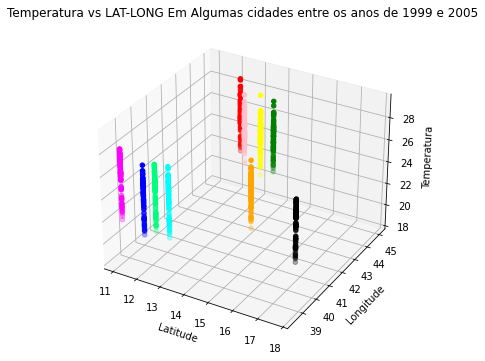

In [136]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

city_names = ['Alagoinhas', 'Barreiras', 'Bom Jesus da Lapa', 'Caetité', 'Caravelas', 'Carinhanha', 'Cipó', 'Correntina','Cruz das Almas', 'Feira de Santana'] 
colors = ['blue', 'red', 'pink', 'orange', 'black', 'green', 'magenta' , 'yellow', 'cyan', 'springgreen']

t = zip(city_names,colors)
for name, color in zip(city_names,colors):
  subdf = df_indexed_by_city.loc[name]
  subdf = subdf[subdf['ANO'] <= 2005]
  xs = subdf['LAT (º DEC.)'][name]
  ys = subdf['LONG (ºdec)'][name]
  zs = subdf['TEMPERATURA MÉDIA'][name]
  ax.scatter(xs, ys,zs, color=color)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Temperatura')

ax.set_title('Temperatura vs LAT-LONG Em Algumas cidades entre os anos de 1999 e 2005')

# Observou-se que a temperatura varia para uma mesma cidade no mesmo ano. A isso atribui-se
# fatores metereológicos e climáticos, portanto mais variáveis precisam ser incorporadas
# a fim de obter um modelo de melhor capacidade de representação da realidade.

# Pode-se observar também que cidades mais próximas tendem a ter temperaturas médias mais aproximadas, 
# o que leva a crer que seja possível estimar a temperatura média de um município se houverem 
# com maior precisão conforme existirem dados de municípios próximos à ele.

Text(0, 0.5, 'Altitude Média - (Metros)')

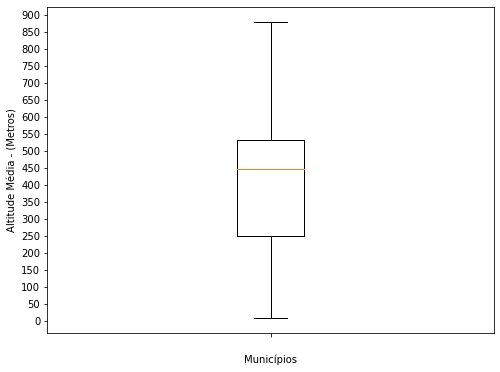

In [122]:
# Boxplot altitude
# Discretizar e plotar numa Escala de cores

altitudes = []
for key in keys_cidades:
  altitudes.append(df_indexed_by_city['ALT(M)'][key][0])

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.yticks(np.arange(0,1100,50))
#plt.ylim(0, 1100)

#plt.title('Normalized (Train x Test) L2 distances by class')
bxplot = ax1.boxplot(altitudes, showfliers=False)
ax1.set_xticklabels(' ')
ax1.set_xlabel('Municípios')
ax1.set_ylabel('Altitude Média - (Metros)')


In [125]:
altitudes

[128.8,
 407.5,
 447.5,
 447.8,
 876.3,
 6.1,
 455.3,
 143.5,
 551.7,
 219.7,
 229.5,
 197.9,
 747.2,
 250.1,
 757.5,
 486.4,
 438.1,
 465.8,
 1001.7,
 255.0,
 397.4,
 532.1,
 362.4,
 450.0,
 879.5]

In [108]:
altitudes

[CIDADE
 Alagoinhas    128.8
 Alagoinhas    128.8
 Alagoinhas    128.8
 Alagoinhas    128.8
 Alagoinhas    128.8
               ...  
 Alagoinhas    128.8
 Alagoinhas    128.8
 Alagoinhas    128.8
 Alagoinhas    128.8
 Alagoinhas    128.8
 Name: ALT(M), Length: 252, dtype: float64,
 CIDADE
 Barra    407.5
 Barra    407.5
 Barra    407.5
 Barra    407.5
 Barra    407.5
          ...  
 Barra    407.5
 Barra    407.5
 Barra    407.5
 Barra    407.5
 Barra    407.5
 Name: ALT(M), Length: 252, dtype: float64,
 CIDADE
 Barreiras    447.5
 Barreiras    447.5
 Barreiras    447.5
 Barreiras    447.5
 Barreiras    447.5
              ...  
 Barreiras    447.5
 Barreiras    447.5
 Barreiras    447.5
 Barreiras    447.5
 Barreiras    447.5
 Name: ALT(M), Length: 252, dtype: float64,
 CIDADE
 Bom Jesus da Lapa    447.8
 Bom Jesus da Lapa    447.8
 Bom Jesus da Lapa    447.8
 Bom Jesus da Lapa    447.8
 Bom Jesus da Lapa    447.8
                      ...  
 Bom Jesus da Lapa    447.8
 Bom Jesus da

In [138]:
keys_cidades[5]

'Caravelas'

In [146]:
nivel_do_mar_ou_prox = []
moderada = []
media = []
elevada = []

for altitude, cidade in zip(altitudes, keys_cidades):
  if altitude <= 255.0:
    nivel_do_mar_ou_prox.append(cidade)
  if altitude > 255.0 and altitude <= 447.8:
    moderada.append(cidade)
  if altitude > 447.8 and altitude <= 551.7:
    media.append(cidade)
  if altitude > 551.7:
    elevada.append(cidade)   

In [147]:
nivel_do_mar_ou_prox

['Alagoinhas',
 'Caravelas',
 'Cipó',
 'Cruz das Almas',
 'Feira de Santana',
 'Guaratinga',
 'Itaberaba',
 'Paulo Afonso']

In [149]:
df_indexed_by_city.loc['Feira de Santana']

TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  LONG (ºdec)  MÊS  \
CIDADE                                                                        
Feira de Santana               26.4   229.5          12.2         39.0    1   
Feira de Santana               26.6   229.5          12.2         39.0    2   
Feira de Santana               26.9   229.5          12.2         39.0    3   
Feira de Santana               25.3   229.5          12.2         39.0    4   
Feira de Santana               23.5   229.5          12.2         39.0    5   
...                             ...     ...           ...          ...  ...   
Feira de Santana               21.9   229.5          12.2         39.0    8   
Feira de Santana               23.0   229.5          12.2         39.0    9   
Feira de Santana               24.6   229.5          12.2         39.0   10   
Feira de Santana               26.2   229.5          12.2         39.0   11   
Feira de Santana               26.5   229.5          12.2         39.0   12   

                   ANO  
CIDADE                  
Feira de Santana  1999  
Feira de Santana  1999  
Feira de Santana  1999  
Feira de Santana  1999  
Feira de Santana  1999  
...                ...  
Feira de Santana  2019  
Feira de Santana  2019  
Feira de Santana  2019  
Feira de Santana  2019  
Feira de Santana  2019  

[252 rows x 6 columns]

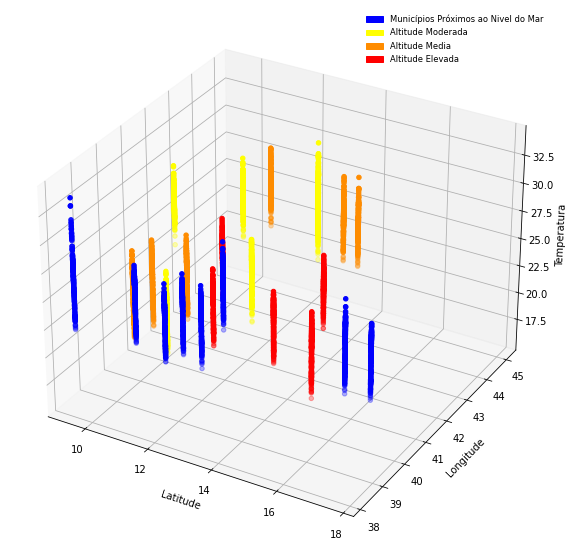

In [882]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

colors = ['blue', 'red', 'pink', 'orange', 'black', 'green', 'magenta' , 'yellow', 'cyan', 'springgreen']

for city_name in nivel_do_mar_ou_prox:
  subdf = df_indexed_by_city.loc[city_name] 
  xs = subdf['LAT (º DEC.)'][city_name]
  ys = subdf['LONG (ºdec)'][city_name]
  zs = subdf['TEMPERATURA MÉDIA'][city_name]
  ax.scatter(xs, ys,zs, color='blue')

for city_name in moderada:
  subdf = df_indexed_by_city.loc[city_name] 
  xs = subdf['LAT (º DEC.)'][city_name]
  ys = subdf['LONG (ºdec)'][city_name]
  zs = subdf['TEMPERATURA MÉDIA'][city_name]
  ax.scatter(xs, ys,zs, color='yellow')
  
for city_name in media:
  subdf = df_indexed_by_city.loc[city_name] 
  xs = subdf['LAT (º DEC.)'][city_name]
  ys = subdf['LONG (ºdec)'][city_name]
  zs = subdf['TEMPERATURA MÉDIA'][city_name]
  ax.scatter(xs, ys,zs, color='darkorange')

for city_name in elevada:
  subdf = df_indexed_by_city.loc[city_name] 
  xs = subdf['LAT (º DEC.)'][city_name]
  ys = subdf['LONG (ºdec)'][city_name]
  zs = subdf['TEMPERATURA MÉDIA'][city_name]
  ax.scatter(xs, ys,zs, color='red')

  
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Temperatura')

nivel_mar = mpatches.Patch(color='blue', label='Municípios Próximos ao Nivel do Mar')    
alt_moderada = mpatches.Patch(color='yellow', label='Altitude Moderada')    
alt_media = mpatches.Patch(color='darkorange', label='Altitude Media')
alt_elevada = mpatches.Patch(color='red', label='Altitude Elevada')

plt.legend(handles=[nivel_mar, alt_moderada, alt_media, alt_elevada], fontsize='small',frameon=False)


#ax.set_title('Temperatura vs LAT-LONG Em Algumas cidades entre os anos de 1999 e 2005')

# Observou-se que a temperatura varia para uma mesma cidade no mesmo ano. A isso atribui-se
# fatores metereológicos e climáticos, portanto mais variáveis precisam ser incorporadas
# a fim de obter um modelo de melhor capacidade de representação da realidade.

# Pode-se observar também que cidades mais próximas tendem a ter temperaturas médias mais aproximadas, 
# o que leva a crer que seja possível estimar a temperatura média de um município se houverem 
# com maior precisão conforme existirem dados de municípios próximos à ele.

Text(0, 0.5, 'Temperatura média')

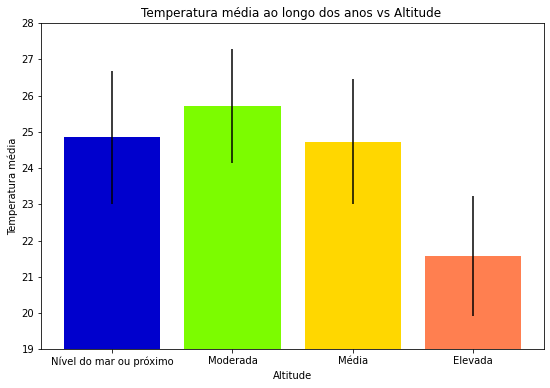

In [199]:
avg_and_std_temp_nivel_mar = []
for city in nivel_do_mar_ou_prox:
  avg_and_std_temp_nivel_mar.append((mean_temperature(city)))
  
avg_and_std_temp_moderada = []
for city in moderada:
  avg_and_std_temp_moderada.append((mean_temperature(city)))
  
avg_and_std_temp_media = []
for city in media:
  avg_and_std_temp_media.append((mean_temperature(city)))

avg_and_std_temp_elevada = []
for city in elevada:
  avg_and_std_temp_elevada.append((mean_temperature(city)))

temperaturas = []
erros = []

avg = []
std = []
for i in range(len(nivel_do_mar_ou_prox)):
  avg.append(avg_and_std_temp_nivel_mar[i][0])
  std.append(avg_and_std_temp_nivel_mar[i][1])
temperaturas.append(statistics.mean(avg))
erros.append(statistics.mean(std))

avg = []
std = []
for i in range(len(moderada)):
  avg.append(avg_and_std_temp_moderada[i][0])
  std.append(avg_and_std_temp_moderada[i][1])
temperaturas.append(statistics.mean(avg))
erros.append(statistics.mean(std))

avg = []
std = []
for i in range(len(media)):
  avg.append(avg_and_std_temp_media[i][0])
  std.append(avg_and_std_temp_media[i][1])
temperaturas.append(statistics.mean(avg))
erros.append(statistics.mean(std))

avg = []
std = []
for i in range(len(elevada)):
  avg.append(avg_and_std_temp_elevada[i][0])
  std.append(avg_and_std_temp_elevada[i][1])
temperaturas.append(statistics.mean(avg))
erros.append(statistics.mean(std))

fig, ax = plt.subplots(figsize=(9, 6))
labels = ['Nível do mar ou próximo', 'Moderada', 'Média', 'Elevada']
colors=['mediumblue', 'lawngreen', 'gold', 'coral']
ax.bar(x=np.arange(len(labels)), height=temperaturas, yerr=erros, color=colors, tick_label=labels)
plt.yticks(np.arange(19,29,1))
plt.ylim(19, 28)
plt.title('Temperatura média ao longo dos anos vs Altitude ')
ax.set_xlabel('Altitude')
ax.set_ylabel('Temperatura média')

# Observações:
# A dispersão é alta pois deve-se levar em consideração que os valores utilizados 
# envolvem uma média de temperatura ao longo dos meses da última década, o que 
# é normal levando em consideração a mudança natural de temperatura ao longo dos 
# anos e também a variação de acordo com a época do ano.

# O padrão adequado seria o decrescimento da amplitude de temperatuda em conformidade
# com o crescimento da altitude, no entanto verifica-se a quebra dessa constatação
# por meio dos municípios de altitude Moderada, porém deve se levar em consideração
# também a imprecisão do critério de definição das categorias.

In [213]:
feira = df_indexed_by_city.loc['Feira de Santana']
teste = feira.keys
feira = feira.reset_index()
len(feira)
feira.keys

Index(['CIDADE', 'TEMPERATURA MÉDIA', 'ALT(M)', 'LAT (º DEC.)', 'LONG (ºdec)',
       'MÊS', 'ANO'],
      dtype='object')

In [201]:
df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               26.7   128.8          12.1   
1               Alagoinhas               26.7   128.8          12.1   
2               Alagoinhas               27.0   128.8          12.1   
3               Alagoinhas               25.6   128.8          12.1   
4               Alagoinhas               24.2   128.8          12.1   
...                    ...                ...     ...           ...   
6295  Vitória da Conquista               18.1   879.5          14.9   
6296  Vitória da Conquista               20.2   879.5          14.9   
6297  Vitória da Conquista               21.7   879.5          14.9   
6298  Vitória da Conquista               23.0   879.5          14.9   
6299  Vitória da Conquista               23.2   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4    1  1999  
1            38.4    2  1999  
2            38.4    3  1999  
3            38.4    4  1999  
4            38.4    5  1999  
...           ...  ...   ...  
6295         40.8    8  2019  
6296         40.8    9  2019  
6297         40.8   10  2019  
6298         40.8   11  2019  
6299         40.8   12  2019  

[6300 rows x 7 columns]

In [218]:
features[0]

'TEMPERATURA MÉDIA'

In [235]:
city[features[0]][6]

22.1

In [274]:
dataset_as_dictionary = {}

for key in keys_cidades:
  dataset_as_dictionary[key] = []
  city = df_indexed_by_city.loc[key]
  features = city.keys()
  city = city.reset_index()
  for i in range(len(city)):
    dataset_as_dictionary[key].append((city[features[0]][i],city[features[1]][i],city[features[2]][i],city[features[3]][i],city[features[4]][i],city[features[5]][i]))


In [286]:
# Stratified Random Sampling.
treino = []
teste = []
teste_dic = {}
temp = dataset_as_dictionary.copy() # Não funciona

for cidade in keys_cidades:
  lista = temp[cidade]
  length = len(lista)
  teste_dic[cidade] = []
  while not(len(lista) <= 0.3 * length):
    features = lista.pop()
    treino.append((cidade, features[0],features[1],features[2],features[3],features[4],features[5]))
    shuffle(lista)
  teste_dic[cidade].extend(lista)  
  for feature in teste_dic[cidade]:
    teste.append((cidade, feature[0],feature[1],feature[2],feature[3],feature[4],feature[5]))
  

In [275]:
len(treino['Feira de Santana'])

177

In [285]:
treino['Feira de Santana'][0][5]

2019

In [277]:
df.columns

Index(['CIDADE', 'TEMPERATURA MÉDIA', 'ALT(M)', 'LAT (º DEC.)', 'LONG (ºdec)',
       'MÊS', 'ANO'],
      dtype='object')

In [290]:
train_df = pd.DataFrame(data=treino, columns=df.columns)
train_df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.9   128.8          12.1   
1               Alagoinhas               21.7   128.8          12.1   
2               Alagoinhas               21.8   128.8          12.1   
3               Alagoinhas               24.7   128.8          12.1   
4               Alagoinhas               24.4   128.8          12.1   
...                    ...                ...     ...           ...   
4420  Vitória da Conquista               21.3   879.5          14.9   
4421  Vitória da Conquista               21.9   879.5          14.9   
4422  Vitória da Conquista               18.3   879.5          14.9   
4423  Vitória da Conquista               21.9   879.5          14.9   
4424  Vitória da Conquista               21.8   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4   12  2019  
1            38.4    7  2004  
2            38.4    7  2006  
3            38.4    5  2016  
4            38.4    5  2012  
...           ...  ...   ...  
4420         40.8   12  2007  
4421         40.8   12  2013  
4422         40.8    7  2016  
4423         40.8    3  2005  
4424         40.8    2  2017  

[4425 rows x 7 columns]

In [292]:
test_df = pd.DataFrame(data=teste, columns=df.columns)
test_df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.8   128.8          12.1   
1               Alagoinhas               22.7   128.8          12.1   
2               Alagoinhas               22.2   128.8          12.1   
3               Alagoinhas               25.2   128.8          12.1   
4               Alagoinhas               26.3   128.8          12.1   
...                    ...                ...     ...           ...   
1870  Vitória da Conquista               22.7   879.5          14.9   
1871  Vitória da Conquista               18.0   879.5          14.9   
1872  Vitória da Conquista               17.6   879.5          14.9   
1873  Vitória da Conquista               20.9   879.5          14.9   
1874  Vitória da Conquista               19.4   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4   11  2005  
1            38.4    6  2001  
2            38.4    8  2005  
3            38.4   11  2001  
4            38.4   12  2002  
...           ...  ...   ...  
1870         40.8    1  2007  
1871         40.8    8  2003  
1872         40.8    7  2018  
1873         40.8    4  2010  
1874         40.8    8  2018  

[1875 rows x 7 columns]

In [294]:
train_df.to_csv('dados_treino.csv')

In [276]:
len(teste['Feira de Santana'])

75

In [308]:
train_dataframe = pd.read_csv('dados_treino.csv')
train_dataframe = train_dataframe.drop('Unnamed: 0', axis=1)
train_dataframe

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.9   128.8          12.1   
1               Alagoinhas               21.7   128.8          12.1   
2               Alagoinhas               21.8   128.8          12.1   
3               Alagoinhas               24.7   128.8          12.1   
4               Alagoinhas               24.4   128.8          12.1   
...                    ...                ...     ...           ...   
4420  Vitória da Conquista               21.3   879.5          14.9   
4421  Vitória da Conquista               21.9   879.5          14.9   
4422  Vitória da Conquista               18.3   879.5          14.9   
4423  Vitória da Conquista               21.9   879.5          14.9   
4424  Vitória da Conquista               21.8   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4   12  2019  
1            38.4    7  2004  
2            38.4    7  2006  
3            38.4    5  2016  
4            38.4    5  2012  
...           ...  ...   ...  
4420         40.8   12  2007  
4421         40.8   12  2013  
4422         40.8    7  2016  
4423         40.8    3  2005  
4424         40.8    2  2017  

[4425 rows x 7 columns]

In [313]:
train_dataframe[df_features[0]][1]

21.7

In [506]:
subdf_1

TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  LONG (ºdec)  MÊS   ANO
CIDADE                                                                     
Alagoinhas               25.9   128.8          12.1         38.4   12  2019
Alagoinhas               24.7   128.8          12.1         38.4    5  2016
Alagoinhas               24.4   128.8          12.1         38.4    5  2012
Alagoinhas               22.1   128.8          12.1         38.4    8  2014
Alagoinhas               26.8   128.8          12.1         38.4    1  2010
...                       ...     ...           ...          ...  ...   ...
Alagoinhas               24.1   128.8          12.1         38.4   11  2011
Alagoinhas               23.1   128.8          12.1         38.4    6  2014
Alagoinhas               25.7   128.8          12.1         38.4    4  2017
Alagoinhas               25.3   128.8          12.1         38.4   10  2016
Alagoinhas               22.6   128.8          12.1         38.4    6  2011

[94 rows x 6 columns]

In [505]:
subdf_2

TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  LONG (ºdec)  MÊS   ANO
CIDADE                                                                     
Alagoinhas               25.9   128.8          12.1         38.4   12  2019
Alagoinhas               24.7   128.8          12.1         38.4    5  2016
Alagoinhas               24.4   128.8          12.1         38.4    5  2012
Alagoinhas               22.1   128.8          12.1         38.4    8  2014
Alagoinhas               26.8   128.8          12.1         38.4    1  2010
...                       ...     ...           ...          ...  ...   ...
Alagoinhas               24.1   128.8          12.1         38.4   11  2011
Alagoinhas               23.1   128.8          12.1         38.4    6  2014
Alagoinhas               25.7   128.8          12.1         38.4    4  2017
Alagoinhas               25.3   128.8          12.1         38.4   10  2016
Alagoinhas               22.6   128.8          12.1         38.4    6  2011

[94 rows x 6 columns]

In [515]:
concatenation_dataframe

Empty DataFrame
Columns: [TEMPERATURA MÉDIA, ALT(M), LAT (º DEC.), LONG (ºdec), MÊS, ANO]
Index: []

In [682]:
# Corte de dados apenas dos últimos 10 e 5 anos para análise dos efeitos sobre o desempenho dos modelos.

train_dataframe_indexed_by_city = pd.read_csv('dados_treino.csv', index_col='CIDADE')
train_dataframe_indexed_by_city = train_dataframe_indexed_by_city.drop('Unnamed: 0', axis=1)
print(train_dataframe_indexed_by_city)
concatenation_dataframe = pd.DataFrame(columns=train_dataframe_indexed_by_city.keys())
for name in keys_cidades:
  subdf = train_dataframe_indexed_by_city.loc[name]
  subdf = subdf[subdf['ANO'] > 2014]
  concatenation_dataframe = pd.DataFrame.append(concatenation_dataframe, subdf)
concatenation_dataframe

                      TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  LONG (ºdec)  \
CIDADE                                                                       
Alagoinhas                         25.9   128.8          12.1         38.4   
Alagoinhas                         21.7   128.8          12.1         38.4   
Alagoinhas                         21.8   128.8          12.1         38.4   
Alagoinhas                         24.7   128.8          12.1         38.4   
Alagoinhas                         24.4   128.8          12.1         38.4   
...                                 ...     ...           ...          ...   
Vitória da Conquista               21.3   879.5          14.9         40.8   
Vitória da Conquista               21.9   879.5          14.9         40.8   
Vitória da Conquista               18.3   879.5          14.9         40.8   
Vitória da Conquista               21.9   879.5          14.9         40.8   
Vitória da Conquista               21.8   879.5          14.9   

TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  LONG (ºdec)  \
Alagoinhas                         25.9   128.8          12.1         38.4   
Alagoinhas                         24.7   128.8          12.1         38.4   
Alagoinhas                         27.0   128.8          12.1         38.4   
Alagoinhas                         26.1   128.8          12.1         38.4   
Alagoinhas                         26.7   128.8          12.1         38.4   
...                                 ...     ...           ...          ...   
Vitória da Conquista               21.1   879.5          14.9         40.8   
Vitória da Conquista               17.9   879.5          14.9         40.8   
Vitória da Conquista               20.9   879.5          14.9         40.8   
Vitória da Conquista               18.3   879.5          14.9         40.8   
Vitória da Conquista               21.8   879.5          14.9         40.8   

                     MÊS   ANO  
Alagoinhas            12  2019  
Alagoinhas             5  2016  
Alagoinhas             3  2018  
Alagoinhas            11  2016  
Alagoinhas             1  2018  
...                   ..   ...  
Vitória da Conquista   3  2018  
Vitória da Conquista   7  2019  
Vitória da Conquista  11  2018  
Vitória da Conquista   7  2016  
Vitória da Conquista   2  2017  

[1071 rows x 6 columns]

In [683]:
temperatura = []
altitude = []
latitude = []
longitude = []
mes = []
ano = []


concatenation_dataframe = concatenation_dataframe.reset_index()


df_features = concatenation_dataframe.keys()
for i in range(len(concatenation_dataframe)):
  temperatura.append(concatenation_dataframe[df_features[1]][i])
  altitude.append(concatenation_dataframe[df_features[2]][i])
  latitude.append(concatenation_dataframe[df_features[3]][i])
  longitude.append(concatenation_dataframe[df_features[4]][i])
  mes.append(concatenation_dataframe[df_features[5]][i])
  ano.append(concatenation_dataframe[df_features[6]][i])

model_shape = {
  "slope":0,
  "intercept":0,
  "r":0,
  "p":0,
  "std_err":0,
} 
  
model_keys = ['temperatura x altitude','temperatura x latitude','temperatura x longitude','temperatura x mes','temperatura x ano']
model = {}
for key in model_keys:
  model[key] = {
  "slope":0,
  "intercept":0,
  "r":0,
  "p":0,
  "std_err":0,
}
  
slope, intercept, r, p, std_err = stats.linregress(altitude, temperatura)
model[model_keys[0]]['slope'] = slope
model[model_keys[0]]['intercept'] = intercept
model[model_keys[0]]['r'] = r
model[model_keys[0]]['p'] = p
model[model_keys[0]]['std_err'] = std_err

slope, intercept, r, p, std_err = stats.linregress(latitude, temperatura)
model[model_keys[1]]['slope'] = slope
model[model_keys[1]]['intercept'] = intercept
model[model_keys[1]]['r'] = r
model[model_keys[1]]['p'] = p
model[model_keys[1]]['std_err'] = std_err

slope, intercept, r, p, std_err = stats.linregress(longitude, temperatura)
model[model_keys[2]]['slope'] = slope
model[model_keys[2]]['intercept'] = intercept
model[model_keys[2]]['r'] = r
model[model_keys[2]]['p'] = p
model[model_keys[2]]['std_err'] = std_err

slope, intercept, r, p, std_err = stats.linregress(mes, temperatura)
model[model_keys[3]]['slope'] = slope
model[model_keys[3]]['intercept'] = intercept
model[model_keys[3]]['r'] = r
model[model_keys[3]]['p'] = p
model[model_keys[3]]['std_err'] = std_err

slope, intercept, r, p, std_err = stats.linregress(ano, temperatura)
model[model_keys[4]]['slope'] = slope
model[model_keys[4]]['intercept'] = intercept
model[model_keys[4]]['r'] = r
model[model_keys[4]]['p'] = p
model[model_keys[4]]['std_err'] = std_err

model

{'temperatura x altitude': {'slope': -0.004834938754623831,
  'intercept': 26.891256750265832,
  'r': -0.4500463700769189,
  'p': 1.5682547958301043e-54,
  'std_err': 0.0002934261687148004},
 'temperatura x latitude': {'slope': -0.29936868334423095,
  'intercept': 28.467108400513812,
  'r': -0.2229105400819184,
  'p': 1.5885553259810158e-13,
  'std_err': 0.04004236903719048},
 'temperatura x longitude': {'slope': 0.1628458207496317,
  'intercept': 18.049382105510816,
  'r': 0.1258778964288244,
  'p': 3.6098614305480507e-05,
  'std_err': 0.039252740724286576},
 'temperatura x mes': {'slope': -0.05494341001319008,
  'intercept': 25.103025230600586,
  'r': -0.07132419842440842,
  'p': 0.019574095383802226,
  'std_err': 0.02350078556902642},
 'temperatura x ano': {'slope': 0.01809178777206781,
  'intercept': -11.750926032657631,
  'r': 0.009647378371668378,
  'p': 0.752488279580362,
  'std_err': 0.05735392033475041}}

In [541]:
model_data = []
model_features = ["slope","intercept","r","p","std_err"]
for key in model_keys:
  model_data.append((key, model[key][model_features[0]],model[key][model_features[1]],model[key][model_features[2]],model[key][model_features[3]],model[key][model_features[4]]))
model_data
columns = ['name']
columns.extend(model_features)
linear_regression_model = pd.DataFrame(data=model_data, columns=columns)
linear_regression_model.to_csv('linear_regression_model_corte5.csv')
linear_regression_model

name     slope   intercept         r             p  \
0   temperatura x altitude -0.004551   26.783704 -0.441329  5.113804e-22   
1   temperatura x latitude -0.298917   28.539653 -0.235269  7.598690e-07   
2  temperatura x longitude  0.103143   20.555113  0.081261  9.162626e-02   
3        temperatura x mes -0.068888   25.244939 -0.092317  5.519731e-02   
4        temperatura x ano  0.359401 -700.667286  0.069186  1.511305e-01   

    std_err  
0  0.000446  
1  0.059551  
2  0.061007  
3  0.035832  
4  0.249912

In [559]:
linear_regression_model['name'][0]

'temperatura x altitude'

In [587]:
from sklearn.metrics import mean_squared_error as mse

def test_model(test_dataframe, linear_regression_model):
  alt = linear_regression_model['slope'][0]
  lat = linear_regression_model['slope'][1]
  lon = linear_regression_model['slope'][2]
  mes = linear_regression_model['slope'][3]
  ano = linear_regression_model['slope'][4]
  intercept = 0
  for i in range(5):
    intercept += linear_regression_model['intercept'][i]

  model_ano = 0  
  y_true = []
  y_pred = []
  for i in range(len(test_dataframe)):
    df_features = test_dataframe.keys()
    altitude = test_dataframe[df_features[2]][i]
    latitude = test_dataframe[df_features[3]][i]
    longitude = test_dataframe[df_features[4]][i]
    mes_i = test_dataframe[df_features[5]][i]
    ano_i = test_dataframe[df_features[6]][i]
    temperatura = alt * altitude + lat*latitude + lon*longitude + mes*mes_i + ano*ano_i + intercept
    temperatura = temperatura / 6
    y_pred.append(temperatura)
    y_true.append(test_dataframe[df_features[1]][i])
    #print("Y_pred: ",temperatura, ' , Y_true:',test_dataframe[df_features[1]][i])
  model_ano = mse(y_true, y_pred)
  print('Mean Squared Error: ', model_ano, '(Com feature ano)')
  
  intercept = 0
  for i in range(4):
    intercept += linear_regression_model['intercept'][i]  
  model_sem_ano = 0  
  y_true = []
  y_pred = []
  for i in range(len(test_dataframe)):
    df_features = test_dataframe.keys()
    altitude = test_dataframe[df_features[2]][i]
    latitude = test_dataframe[df_features[3]][i]
    longitude = test_dataframe[df_features[4]][i]
    mes_i = test_dataframe[df_features[5]][i]
    temperatura = alt * altitude + lat*latitude + lon*longitude + mes*mes_i + intercept
    temperatura = temperatura / 5
    y_pred.append(temperatura)
    y_true.append(test_dataframe[df_features[1]][i])
  model_sem_ano = mse(y_true, y_pred)
  print('Mean Squared Error: ', model_sem_ano, '(Sem feature ano)')  

  intercept = 0
  for i in range(3):
    intercept += linear_regression_model['intercept'][i]  
  model_sem_mes = 0  
  y_true = []
  y_pred = []
  for i in range(len(test_dataframe)):
    df_features = test_dataframe.keys()
    altitude = test_dataframe[df_features[2]][i]
    latitude = test_dataframe[df_features[3]][i]
    longitude = test_dataframe[df_features[4]][i]
    mes_i = test_dataframe[df_features[5]][i]
    temperatura = alt * altitude + lat*latitude + lon*longitude + intercept
    temperatura = temperatura / 4
    y_pred.append(temperatura)
    y_true.append(test_dataframe[df_features[1]][i])
  model_sem_mes = mse(y_true, y_pred)
  print('Mean Squared Error: ', model_sem_mes, '(Sem feature mes e ano)')    

In [588]:
# Test routine:
paths = ['modelo_regressao_linear/{}.csv', 'modelo_regress_linear_corte10/{}.csv', 'modelo_regress_linear_corte5/{}.csv','modelo_regress_linear_corte2/{}.csv']
titles = ['linear_regression_model_baseline', 'linear_regression_model_corte10', 'linear_regression_model_corte5', 'linear_regression_model_corte2']

for i in range(len(paths)):
  path = paths[i]
  path = path.format(titles[i])
  load_model = pd.read_csv(path) 
  print('Modelo: ', titles[i])
  test_model(test_df, load_model)
# H: como a temperatura média varia com  o decorrer do tempo em função de diversos fatores metereológicos, geográficos etc..
# que por sua vez sofrem influência das consequências das ações do ser humano com o meio, 
# relações que podem ser obtidas à partir de dados de 20 anos atrás podem não refletir representativamente 
# o mundo de hoje.
# Os resultados encontrados nos deram suporte para acreditar que isso possa ser verdade até certo ponto (corte5),
# e nos motivou a conduzir as próximas análises apenas com dados dos últimos 5 anos. 

Modelo:  linear_regression_model_baseline
Mean Squared Error:  22.403457955405784 (Com feature ano)
Mean Squared Error:  29.680547476275855 (Sem feature ano)
Mean Squared Error:  43.08268568038433 (Sem feature mes e ano)
Modelo:  linear_regression_model_corte10
Mean Squared Error:  21.463723182805623 (Com feature ano)
Mean Squared Error:  28.07238348498347 (Sem feature ano)
Mean Squared Error:  41.20175841552263 (Sem feature mes e ano)
Modelo:  linear_regression_model_corte5
Mean Squared Error:  19.99844147026798 (Com feature ano)
Mean Squared Error:  26.675350853172688 (Sem feature ano)
Mean Squared Error:  39.54925492319826 (Sem feature mes e ano)
Modelo:  linear_regression_model_corte2
Mean Squared Error:  24.153000073609974 (Com feature ano)
Mean Squared Error:  26.340505609501363 (Sem feature ano)
Mean Squared Error:  39.159501169682216 (Sem feature mes e ano)


In [549]:
test_df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.8   128.8          12.1   
1               Alagoinhas               22.7   128.8          12.1   
2               Alagoinhas               22.2   128.8          12.1   
3               Alagoinhas               25.2   128.8          12.1   
4               Alagoinhas               26.3   128.8          12.1   
...                    ...                ...     ...           ...   
1870  Vitória da Conquista               22.7   879.5          14.9   
1871  Vitória da Conquista               18.0   879.5          14.9   
1872  Vitória da Conquista               17.6   879.5          14.9   
1873  Vitória da Conquista               20.9   879.5          14.9   
1874  Vitória da Conquista               19.4   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4   11  2005  
1            38.4    6  2001  
2            38.4    8  2005  
3            38.4   11  2001  
4            38.4   12  2002  
...           ...  ...   ...  
1870         40.8    1  2007  
1871         40.8    8  2003  
1872         40.8    7  2018  
1873         40.8    4  2010  
1874         40.8    8  2018  

[1875 rows x 7 columns]

In [520]:
model_keys

['temperatura x altitude',
 'temperatura x latitude',
 'temperatura x longitude',
 'temperatura x mes',
 'temperatura x ano']

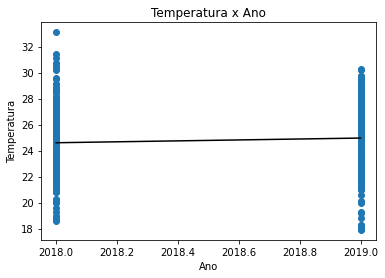

In [548]:
slope = model[model_keys[4]]['slope']
intercept = model[model_keys[4]]['intercept']

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, ano))

plt.scatter(ano, temperatura)
plt.plot(ano, mymodel, color='black')
plt.title('Temperatura x Ano')
plt.xlabel('Ano')
plt.ylabel('Temperatura')
plt.savefig('temperatura_x_ano.png')
plt.show() 

In [599]:
temp_alt = polynomial_models[0]
altitude = test_df[df_features[2]][0]
temp_alt(altitude)

25.44395723054651

In [637]:
def test_routine_polynomial_models(model_list, test_dataframe):
  degree = 2
  for i in range(0,len(polynomial_models),5):
    temp_alt = polynomial_models[i]
    temp_lat = polynomial_models[i+1]
    temp_lon = polynomial_models[i+2]
    temp_mes = polynomial_models[i+3]
    temp_ano = polynomial_models[i+4]
    y_true = []
    y_pred = []
    for j in range(len(test_dataframe)):
      df_features = test_dataframe.keys()
      altitude = test_dataframe[df_features[2]][j]
      latitude = test_dataframe[df_features[3]][j]
      longitude = test_dataframe[df_features[4]][j]
      mes_i = test_dataframe[df_features[5]][j]
      ano_i = test_dataframe[df_features[6]][j]
      temperatura = temp_alt(altitude) + temp_lat(latitude) + temp_lon(longitude) + temp_mes(mes_i) + temp_ano(ano_i)
      temperatura = temperatura / 5
      y_pred.append(temperatura)
      y_true.append(test_dataframe[df_features[1]][j])
    model_mse = mse(y_true, y_pred)
    print('Mean Squared Error: ', model_mse, '(Polynomial Model, degree: ', degree,')')
    degree += 1

In [632]:
print('Modelo Polinomial corte 20 (sem feature ano)')
test_routine_polynomial_models(polynomial_models, test_df)

Modelo Polinomial corte 20 (sem feature ano)
Mean Squared Error:  28.796343197132927 (Polynomial Model, degree:  2 )
Mean Squared Error:  28.61373192532134 (Polynomial Model, degree:  3 )
Mean Squared Error:  28.27484015150219 (Polynomial Model, degree:  4 )
Mean Squared Error:  28.23090005429951 (Polynomial Model, degree:  5 )


In [639]:
print('Modelo Polinomial corte 5 (com feature ano)')
test_routine_polynomial_models(polynomial_models, test_df)

Modelo Polinomial corte 5 (com feature ano)
Mean Squared Error:  12.248525644578875 (Polynomial Model, degree:  2 )
Mean Squared Error:  4.6011494399493715 (Polynomial Model, degree:  3 )
Mean Squared Error:  4.277855967996905 (Polynomial Model, degree:  4 )
Mean Squared Error:  4.21774820792532 (Polynomial Model, degree:  5 )


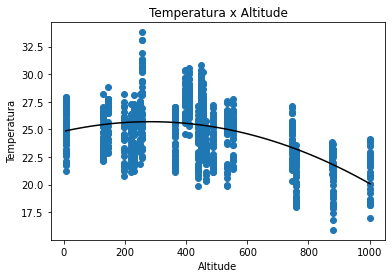

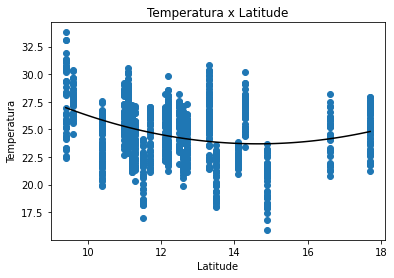

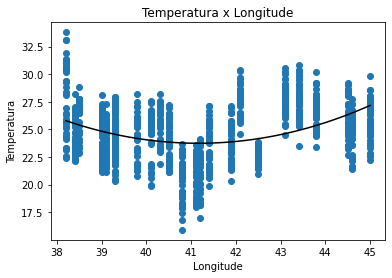

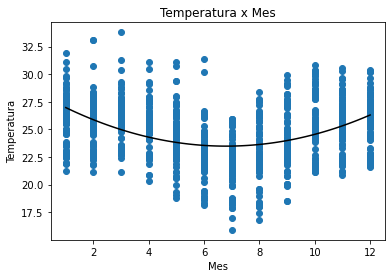

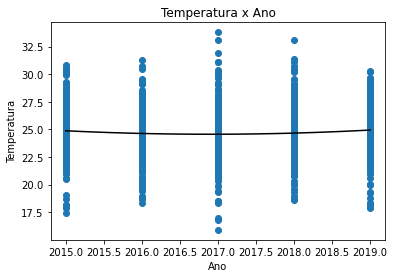

['name', 'intercept', 'linear', 'quadratic', 'squared_r']


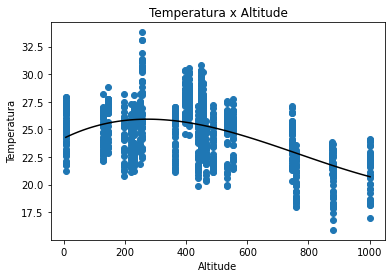

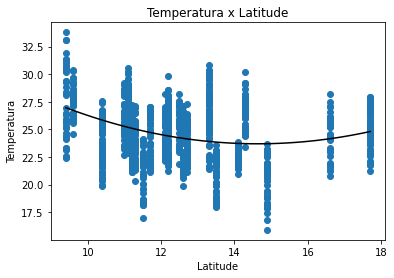

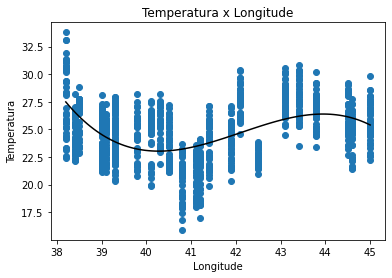

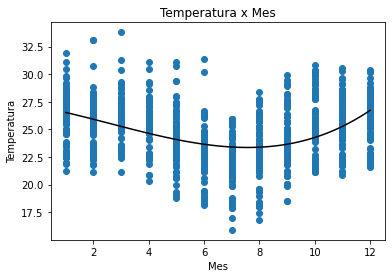

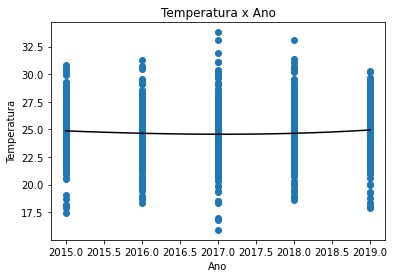

['name', 'intercept', 'linear', 'quadratic', 'cubic', 'squared_r']


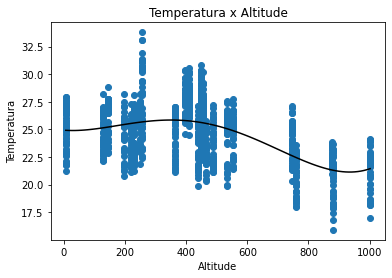

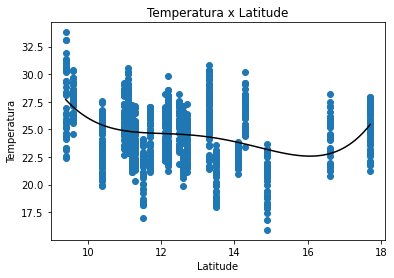

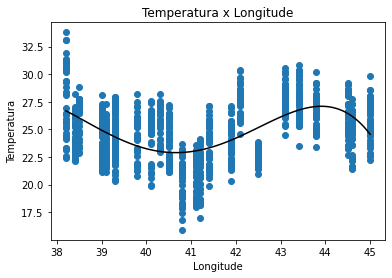

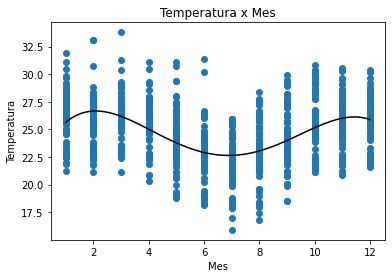

/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: RankWarning:

Polyfit may be poorly conditioned

/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: RankWarning:

Polyfit may be poorly conditioned



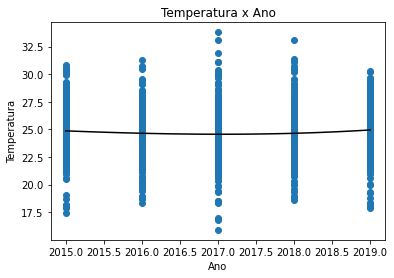

['name', 'intercept', 'linear', 'quadratic', 'cubic', 'fourth', 'squared_r']


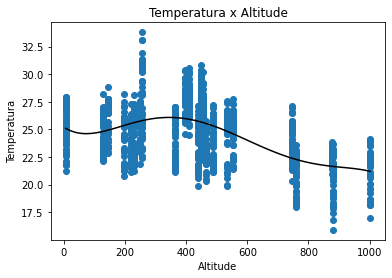

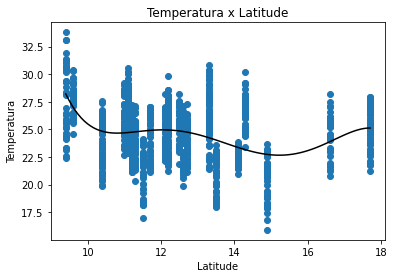

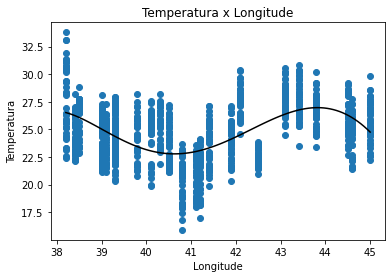

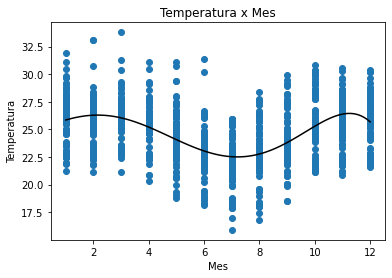

/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: RankWarning:

Polyfit may be poorly conditioned

/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: RankWarning:

Polyfit may be poorly conditioned



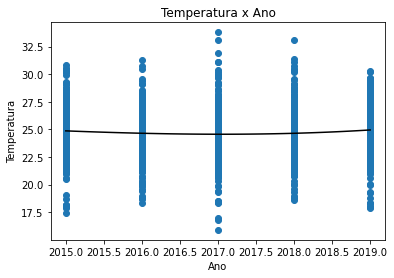

['name', 'intercept', 'linear', 'quadratic', 'cubic', 'fourth', 'fifth', 'squared_r']


In [635]:
polynomial_models = []
dataset_features = [altitude, latitude, longitude, mes, ano]
feature_names = ['Altitude', 'Latitude', 'Longitude', 'Mes', 'Ano']

model_feature_0 = 'intercept'
model_feature_1 = 'linear'
model_feature_2 = 'quadratic'
model_feature_3 = 'cubic'
model_feature_4 = 'fourth'
model_feature_5 = 'fifth'

model_features = [model_feature_0,model_feature_1,model_feature_2,model_feature_3,model_feature_4,model_feature_5]

cubic = 0
fourth = 0
fifth = 0

shape_deg2 = intercept, linear, quadratic
shape_deg3 = intercept, linear, quadratic, cubic
shape_deg4 = intercept, linear, quadratic, cubic, fourth
shape_deg5 = intercept, linear, quadratic, cubic, fourth, fifth

shapes = [shape_deg2, shape_deg3, shape_deg4, shape_deg5]
names = ['polynomial_model_deg2','polynomial_model_deg3','polynomial_model_deg4','polynomial_model_deg5']
for i in range(len(shapes)):
  dataframe_data = []
  columns = ['name']
  for j in range(len(dataset_features)):
    title = 'Temperatura x {}'
    # Obtain Model
    regression_model = np.poly1d(np.polyfit(dataset_features[j], temperatura, i+2))    
    shapes[i] = np.polyfit(dataset_features[j], temperatura, i+2)
    polynomial_models.append(regression_model)
    # Plot fit to data
    min_index = np.argmin(dataset_features[j])
    max_index = np.argmax(dataset_features[j])
    myline = np.linspace(dataset_features[j][min_index], dataset_features[j][max_index], 100)
    
    plt.scatter(dataset_features[j], temperatura)
    plt.plot(myline, regression_model(myline), color='black')
    title = title.format(feature_names[j])
    plt.title(title)
    plt.xlabel(feature_names[j])
    plt.ylabel('Temperatura')
    r2 = r2_score(temperatura, regression_model(dataset_features[j]))
    #plt.savefig('deg_'+str(i+2)+'_'+title+'.png')
    plt.show()
    
    # Save dataframe:    
    t1 = tuple([title])
    t2 = tuple(shapes[i])
    t3 = list(t1+t2)
    t3.append(r2)
    t3 = tuple(t3)
    dataframe_data.append(t3)
  for n in range(0,i+3):
    columns.append(model_features[n])
  columns.append('squared_r')
  print(columns)
  model_dataframe = pd.DataFrame(data=dataframe_data, columns=columns)
  model_dataframe.to_csv(names[i]+'.csv')
    
    

In [ ]:
# Apesar da dispersão dos dados acima, é possível observar um comportamento
# padronizado de "dispersão organizada", que se analisarmos bem é caracterizada 
# pelo fato de ter-se amostras iguais para meses e anos diferentes 

In [413]:
encoded_mes[1]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [443]:
# Categorização
encoded_mes = []
for i in range(len(mes)):
    encoded_mes.append([0] * 12)
    encoded_mes[i][mes[i]-1] = 1
    
year_dict = {}
counter = 0
for i in range(1999,2020):
  year_dict[i] = counter
  counter += 1 

encoded_ano = []
for i in range(len(ano)):
  encoded_ano.append([0] * 21)
  encoded_ano[i][year_dict[ano[i]]] = 1

# Normalização dos atributos numéricos  
normalized_altitude = []
normalized_latitude = []
normalized_longitude = []

min_index = np.argmin(altitude)
max_index = np.argmax(altitude)
min_altitude = altitude[min_index]
max_altitude = altitude[max_index]

min_index = np.argmin(latitude)
max_index = np.argmax(latitude)
min_latitude = latitude[min_index]
max_latitude = latitude[max_index]

min_index = np.argmin(longitude)
max_index = np.argmax(longitude)
min_longitude = longitude[min_index]
max_longitude = longitude[max_index]

for i in range(len(altitude)):
  normalized_altitude.append(((altitude[i] - min_altitude)/(max_altitude-min_altitude)))
  normalized_latitude.append(((latitude[i] - min_latitude)/(max_latitude-min_latitude)))
  normalized_longitude.append(((longitude[i] - min_longitude)/(max_longitude-min_longitude)))
    
# value - min / max - min

In [447]:
train_dataframe


CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.9   128.8          12.1   
1               Alagoinhas               21.7   128.8          12.1   
2               Alagoinhas               21.8   128.8          12.1   
3               Alagoinhas               24.7   128.8          12.1   
4               Alagoinhas               24.4   128.8          12.1   
...                    ...                ...     ...           ...   
4420  Vitória da Conquista               21.3   879.5          14.9   
4421  Vitória da Conquista               21.9   879.5          14.9   
4422  Vitória da Conquista               18.3   879.5          14.9   
4423  Vitória da Conquista               21.9   879.5          14.9   
4424  Vitória da Conquista               21.8   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4   12  2019  
1            38.4    7  2004  
2            38.4    7  2006  
3            38.4    5  2016  
4            38.4    5  2012  
...           ...  ...   ...  
4420         40.8   12  2007  
4421         40.8   12  2013  
4422         40.8    7  2016  
4423         40.8    3  2005  
4424         40.8    2  2017  

[4425 rows x 7 columns]

In [474]:
# Novo dataframe: 
preprocessed_train_dataframe = []
for i in range(len(train_dataframe)):
  t = []
  t.append(train_dataframe['CIDADE'][i])
  t.append(temperatura[i])
  t.append(normalized_altitude[i])
  t.append(normalized_latitude[i])
  t.append(normalized_longitude[i])
  t = tuple(t)
  
  temporary = []
  for j in range(len(encoded_mes[i])):
    temporary.append(encoded_mes[i][j])
  temporary = tuple(temporary)
  t = t + temporary
  
  temporary = []
  for j in range(len(encoded_ano[i])):
    temporary.append(encoded_ano[i][j])
  temporary = tuple(temporary)
  t = t + temporary  
  preprocessed_train_dataframe.append(t)

In [450]:
train_dataframe['CIDADE'][0]

'Alagoinhas'

In [464]:
len(preprocessed_train_dataframe[0])

38

In [466]:
train_dataframe.keys()[0]

'CIDADE'

In [475]:
columns = [train_dataframe.keys()[0], train_dataframe.keys()[1], train_dataframe.keys()[2], train_dataframe.keys()[3], train_dataframe.keys()[4]]
title = "mes_n{}"
for i in range(12):
  columns.append(title.format(i+1))
title = "ano_n{}"
for i in range(21):
  columns.append(title.format(i+1))

In [472]:
len(columns)

38

In [477]:
preprocessed_train_df = pd.DataFrame(data=preprocessed_train_dataframe,columns=columns)
preprocessed_train_df.to_csv('preprocessed_train_dataset.csv')

In [478]:
preprocessed_train_df

CIDADE  TEMPERATURA MÉDIA    ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.9  0.123242      0.325301   
1               Alagoinhas               21.7  0.123242      0.325301   
2               Alagoinhas               21.8  0.123242      0.325301   
3               Alagoinhas               24.7  0.123242      0.325301   
4               Alagoinhas               24.4  0.123242      0.325301   
...                    ...                ...       ...           ...   
4420  Vitória da Conquista               21.3  0.877260      0.662651   
4421  Vitória da Conquista               21.9  0.877260      0.662651   
4422  Vitória da Conquista               18.3  0.877260      0.662651   
4423  Vitória da Conquista               21.9  0.877260      0.662651   
4424  Vitória da Conquista               21.8  0.877260      0.662651   

      LONG (ºdec)  mes_n1  mes_n2  mes_n3  mes_n4  mes_n5  ...  ano_n12  \
0        0.029412       0       0       0       0       0  ...        0   
1        0.029412       0       0       0       0       0  ...        0   
2        0.029412       0       0       0       0       0  ...        0   
3        0.029412       0       0       0       0       1  ...        0   
4        0.029412       0       0       0       0       1  ...        0   
...           ...     ...     ...     ...     ...     ...  ...      ...   
4420     0.382353       0       0       0       0       0  ...        0   
4421     0.382353       0       0       0       0       0  ...        0   
4422     0.382353       0       0       0       0       0  ...        0   
4423     0.382353       0       0       1       0       0  ...        0   
4424     0.382353       0       1       0       0       0  ...        0   

      ano_n13  ano_n14  ano_n15  ano_n16  ano_n17  ano_n18  ano_n19  ano_n20  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        1        0        0   
4           0        1        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4420        0        0        0        0        0        0        0        0   
4421        0        0        1        0        0        0        0        0   
4422        0        0        0        0        0        1        0        0   
4423        0        0        0        0        0        0        0        0   
4424        0        0        0        0        0        0        1        0   

      ano_n21  
0           1  
1           0  
2           0  
3           0  
4           0  
...       ...  
4420        0  
4421        0  
4422        0  
4423        0  
4424        0  

[4425 rows x 38 columns]

In [480]:
from sklearn.linear_model import a

In [690]:
string = 'ano_n{}'
index = 17
for i in range(5):
  print(string.format(index+i))

ano_n17
ano_n18
ano_n19
ano_n20
ano_n21


In [694]:
preprocessed_train_df.loc['Alagoinhas']

TEMPERATURA MÉDIA    ALT(M)  LAT (º DEC.)  LONG (ºdec)  mes_n1  \
CIDADE                                                                       
Alagoinhas               25.9  0.123242      0.325301     0.029412       0   
Alagoinhas               21.7  0.123242      0.325301     0.029412       0   
Alagoinhas               21.8  0.123242      0.325301     0.029412       0   
Alagoinhas               24.7  0.123242      0.325301     0.029412       0   
Alagoinhas               24.4  0.123242      0.325301     0.029412       0   
...                       ...       ...           ...          ...     ...   
Alagoinhas               25.7  0.123242      0.325301     0.029412       0   
Alagoinhas               23.2  0.123242      0.325301     0.029412       0   
Alagoinhas               24.3  0.123242      0.325301     0.029412       0   
Alagoinhas               25.3  0.123242      0.325301     0.029412       0   
Alagoinhas               22.6  0.123242      0.325301     0.029412       0   

            mes_n2  mes_n3  mes_n4  mes_n5  mes_n6  ...  ano_n12  ano_n13  \
CIDADE                                              ...                     
Alagoinhas       0       0       0       0       0  ...        0        0   
Alagoinhas       0       0       0       0       0  ...        0        0   
Alagoinhas       0       0       0       0       0  ...        0        0   
Alagoinhas       0       0       0       1       0  ...        0        0   
Alagoinhas       0       0       0       1       0  ...        0        0   
...            ...     ...     ...     ...     ...  ...      ...      ...   
Alagoinhas       0       0       1       0       0  ...        0        0   
Alagoinhas       0       0       0       0       1  ...        0        0   
Alagoinhas       0       0       0       0       0  ...        0        0   
Alagoinhas       0       0       0       0       0  ...        0        0   
Alagoinhas       0       0       0       0       1  ...        0        1   

            ano_n14  ano_n15  ano_n16  ano_n17  ano_n18  ano_n19  ano_n20  \
CIDADE                                                                      
Alagoinhas        0        0        0        0        0        0        0   
Alagoinhas        0        0        0        0        0        0        0   
Alagoinhas        0        0        0        0        0        0        0   
Alagoinhas        0        0        0        0        1        0        0   
Alagoinhas        1        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
Alagoinhas        0        0        0        0        0        1        0   
Alagoinhas        0        0        0        0        0        0        0   
Alagoinhas        0        0        0        0        0        0        0   
Alagoinhas        0        0        0        0        1        0        0   
Alagoinhas        0        0        0        0        0        0        0   

            ano_n21  
CIDADE               
Alagoinhas        1  
Alagoinhas        0  
Alagoinhas        0  
Alagoinhas        0  
Alagoinhas        0  
...             ...  
Alagoinhas        0  
Alagoinhas        0  
Alagoinhas        0  
Alagoinhas        0  
Alagoinhas        0  

[177 rows x 37 columns]

In [698]:
preprocessed_train_df

TEMPERATURA MÉDIA    ALT(M)  LAT (º DEC.)  LONG (ºdec)  \
CIDADE                                                                         
Alagoinhas                         25.9  0.123242      0.325301     0.029412   
Alagoinhas                         21.7  0.123242      0.325301     0.029412   
Alagoinhas                         21.8  0.123242      0.325301     0.029412   
Alagoinhas                         24.7  0.123242      0.325301     0.029412   
Alagoinhas                         24.4  0.123242      0.325301     0.029412   
...                                 ...       ...           ...          ...   
Vitória da Conquista               21.3  0.877260      0.662651     0.382353   
Vitória da Conquista               21.9  0.877260      0.662651     0.382353   
Vitória da Conquista               18.3  0.877260      0.662651     0.382353   
Vitória da Conquista               21.9  0.877260      0.662651     0.382353   
Vitória da Conquista               21.8  0.877260      0.662651     0.382353   

                      mes_n1  mes_n2  mes_n3  mes_n4  mes_n5  mes_n6  ...  \
CIDADE                                                                ...   
Alagoinhas                 0       0       0       0       0       0  ...   
Alagoinhas                 0       0       0       0       0       0  ...   
Alagoinhas                 0       0       0       0       0       0  ...   
Alagoinhas                 0       0       0       0       1       0  ...   
Alagoinhas                 0       0       0       0       1       0  ...   
...                      ...     ...     ...     ...     ...     ...  ...   
Vitória da Conquista       0       0       0       0       0       0  ...   
Vitória da Conquista       0       0       0       0       0       0  ...   
Vitória da Conquista       0       0       0       0       0       0  ...   
Vitória da Conquista       0       0       1       0       0       0  ...   
Vitória da Conquista       0       1       0       0       0       0  ...   

                      ano_n12  ano_n13  ano_n14  ano_n15  ano_n16  ano_n17  \
CIDADE                                                                       
Alagoinhas                  0        0        0        0        0        0   
Alagoinhas                  0        0        0        0        0        0   
Alagoinhas                  0        0        0        0        0        0   
Alagoinhas                  0        0        0        0        0        0   
Alagoinhas                  0        0        1        0        0        0   
...                       ...      ...      ...      ...      ...      ...   
Vitória da Conquista        0        0        0        0        0        0   
Vitória da Conquista        0        0        0        1        0        0   
Vitória da Conquista        0        0        0        0        0        0   
Vitória da Conquista        0        0        0        0        0        0   
Vitória da Conquista        0        0        0        0        0        0   

                      ano_n18  ano_n19  ano_n20  ano_n21  
CIDADE                                                    
Alagoinhas                  0        0        0        1  
Alagoinhas                  0        0        0        0  
Alagoinhas                  0        0        0        0  
Alagoinhas                  1        0        0        0  
Alagoinhas                  0        0        0        0  
...                       ...      ...      ...      ...  
Vitória da Conquista        0        0        0        0  
Vitória da Conquista        0        0        0        0  
Vitória da Conquista        1        0        0        0  
Vitória da Conquista        0        0        0        0  
Vitória da Conquista        0        1        0        0  

[4425 rows x 37 columns]

In [726]:
len(temperatura)

1071

In [865]:
len(row[1])

38

In [876]:
concatenation_dataframe.keys()[33]

'ano_n17'

In [867]:
concatenation_dataframe = pd.DataFrame(columns=preprocessed_train_df.keys())
#preprocessed_train_df = preprocessed_train_df.reset_index()

train_dataframe_cut5 = []
for row in preprocessed_train_df.iterrows():
  if row[1][33] == 1 or row[1][34] == 1 or row[1][35] == 1 or row[1][36] == 1 or row[1][37] == 1:
    train_dataframe_cut5.append(row[1])

concatenation_dataframe = pd.DataFrame(train_dataframe_cut5, columns=preprocessed_train_df.keys())
concatenation_dataframe = concatenation_dataframe.reset_index()
concatenation_dataframe = concatenation_dataframe.drop('index', axis=1)
concatenation_dataframe

CIDADE  TEMPERATURA MÉDIA    ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.9  0.123242      0.325301   
1               Alagoinhas               24.7  0.123242      0.325301   
2               Alagoinhas               27.0  0.123242      0.325301   
3               Alagoinhas               26.1  0.123242      0.325301   
4               Alagoinhas               26.7  0.123242      0.325301   
...                    ...                ...       ...           ...   
1066  Vitória da Conquista               21.1  0.877260      0.662651   
1067  Vitória da Conquista               17.9  0.877260      0.662651   
1068  Vitória da Conquista               20.9  0.877260      0.662651   
1069  Vitória da Conquista               18.3  0.877260      0.662651   
1070  Vitória da Conquista               21.8  0.877260      0.662651   

      LONG (ºdec)  mes_n1  mes_n2  mes_n3  mes_n4  mes_n5  ...  ano_n12  \
0        0.029412       0       0       0       0       0  ...        0   
1        0.029412       0       0       0       0       1  ...        0   
2        0.029412       0       0       1       0       0  ...        0   
3        0.029412       0       0       0       0       0  ...        0   
4        0.029412       1       0       0       0       0  ...        0   
...           ...     ...     ...     ...     ...     ...  ...      ...   
1066     0.382353       0       0       1       0       0  ...        0   
1067     0.382353       0       0       0       0       0  ...        0   
1068     0.382353       0       0       0       0       0  ...        0   
1069     0.382353       0       0       0       0       0  ...        0   
1070     0.382353       0       1       0       0       0  ...        0   

      ano_n13  ano_n14  ano_n15  ano_n16  ano_n17  ano_n18  ano_n19  ano_n20  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        1        0        0   
2           0        0        0        0        0        0        0        1   
3           0        0        0        0        0        1        0        0   
4           0        0        0        0        0        0        0        1   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1066        0        0        0        0        0        0        0        1   
1067        0        0        0        0        0        0        0        0   
1068        0        0        0        0        0        0        0        1   
1069        0        0        0        0        0        1        0        0   
1070        0        0        0        0        0        0        1        0   

      ano_n21  
0           1  
1           0  
2           0  
3           0  
4           0  
...       ...  
1066        0  
1067        1  
1068        0  
1069        0  
1070        0  

[1071 rows x 38 columns]

In [868]:
x_train = []
y_train = []
for i in range(len(concatenation_dataframe)):
  t = tuple()
  for j in range(2,len(concatenation_dataframe.keys())):
    l = []
    key = concatenation_dataframe.keys()[j]
    l.append(concatenation_dataframe[key][i])
    t = t + tuple(l)
  x_train.append(t)
  temp_key = concatenation_dataframe.keys()[1]
  y_train.append(concatenation_dataframe[temp_key][i])
multivariateLR_cut5 = LinearRegression()
multivariateLR_cut5.fit(x_train, y_train)

LinearRegression()

In [762]:
x_train = []
y_train = []
for i in range(len(preprocessed_train_df)):
  t = tuple()
  for j in range(2,len(preprocessed_train_df.keys())):
    l = []
    key = preprocessed_train_df.keys()[j]
    l.append(preprocessed_train_df[key][i])
    t = t + tuple(l)
  x_train.append(t)
  temp_key = preprocessed_train_df.keys()[1]
  y_train.append(preprocessed_train_df[temp_key][i])
multivariateLR_cut20 = LinearRegression()
multivariateLR_cut20.fit(x_train, y_train)

LinearRegression()

In [784]:
temperatura = []
altitude = []
latitude = []
longitude = []
mes = []
ano = []


df_features = test_df.keys()
for i in range(len(test_df)):
  temperatura.append(test_df[df_features[1]][i])
  altitude.append(test_df[df_features[2]][i])
  latitude.append(test_df[df_features[3]][i])
  longitude.append(test_df[df_features[4]][i])
  mes.append(test_df[df_features[5]][i])
  ano.append(test_df[df_features[6]][i])


# Categorização
encoded_mes = []
for i in range(len(mes)):
    encoded_mes.append([0] * 12)
    encoded_mes[i][mes[i]-1] = 1
    
year_dict = {}
counter = 0
for i in range(1999,2020):
  year_dict[i] = counter
  counter += 1 

encoded_ano = []
for i in range(len(ano)):
  encoded_ano.append([0] * 21)
  encoded_ano[i][year_dict[ano[i]]] = 1

# Normalização dos atributos numéricos  
normalized_altitude = []
normalized_latitude = []
normalized_longitude = []

min_index = np.argmin(altitude)
max_index = np.argmax(altitude)
min_altitude = altitude[min_index]
max_altitude = altitude[max_index]

min_index = np.argmin(latitude)
max_index = np.argmax(latitude)
min_latitude = latitude[min_index]
max_latitude = latitude[max_index]

min_index = np.argmin(longitude)
max_index = np.argmax(longitude)
min_longitude = longitude[min_index]
max_longitude = longitude[max_index]

for i in range(len(altitude)):
  normalized_altitude.append(((altitude[i] - min_altitude)/(max_altitude-min_altitude)))
  normalized_latitude.append(((latitude[i] - min_latitude)/(max_latitude-min_latitude)))
  normalized_longitude.append(((longitude[i] - min_longitude)/(max_longitude-min_longitude)))
    
# value - min / max - min

# Novo dataframe: 
preprocessed_test_dataframe = []
for i in range(len(test_df)):
  t = []
  t.append(test_df['CIDADE'][i])
  t.append(temperatura[i])
  t.append(normalized_altitude[i])
  t.append(normalized_latitude[i])
  t.append(normalized_longitude[i])
  t = tuple(t)
  
  temporary = []
  for j in range(len(encoded_mes[i])):
    temporary.append(encoded_mes[i][j])
  temporary = tuple(temporary)
  t = t + temporary
  
  temporary = []
  for j in range(len(encoded_ano[i])):
    temporary.append(encoded_ano[i][j])
  temporary = tuple(temporary)
  t = t + temporary  
  preprocessed_test_dataframe.append(t)

columns = [test_df.keys()[0], test_df.keys()[1], test_df.keys()[2], test_df.keys()[3], test_df.keys()[4]]
title = "mes_n{}"
for i in range(12):
  columns.append(title.format(i+1))
title = "ano_n{}"
for i in range(21):
  columns.append(title.format(i+1))

preprocessed_test_df = pd.DataFrame(data=preprocessed_test_dataframe,columns=columns)
#preprocessed_test_df.to_csv('preprocessed_test_dataset.csv')
preprocessed_test_df

CIDADE  TEMPERATURA MÉDIA    ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.8  0.123242      0.325301   
1               Alagoinhas               22.7  0.123242      0.325301   
2               Alagoinhas               22.2  0.123242      0.325301   
3               Alagoinhas               25.2  0.123242      0.325301   
4               Alagoinhas               26.3  0.123242      0.325301   
...                    ...                ...       ...           ...   
1870  Vitória da Conquista               22.7  0.877260      0.662651   
1871  Vitória da Conquista               18.0  0.877260      0.662651   
1872  Vitória da Conquista               17.6  0.877260      0.662651   
1873  Vitória da Conquista               20.9  0.877260      0.662651   
1874  Vitória da Conquista               19.4  0.877260      0.662651   

      LONG (ºdec)  mes_n1  mes_n2  mes_n3  mes_n4  mes_n5  ...  ano_n12  \
0        0.029412       0       0       0       0       0  ...        0   
1        0.029412       0       0       0       0       0  ...        0   
2        0.029412       0       0       0       0       0  ...        0   
3        0.029412       0       0       0       0       0  ...        0   
4        0.029412       0       0       0       0       0  ...        0   
...           ...     ...     ...     ...     ...     ...  ...      ...   
1870     0.382353       1       0       0       0       0  ...        0   
1871     0.382353       0       0       0       0       0  ...        0   
1872     0.382353       0       0       0       0       0  ...        0   
1873     0.382353       0       0       0       1       0  ...        1   
1874     0.382353       0       0       0       0       0  ...        0   

      ano_n13  ano_n14  ano_n15  ano_n16  ano_n17  ano_n18  ano_n19  ano_n20  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1870        0        0        0        0        0        0        0        0   
1871        0        0        0        0        0        0        0        0   
1872        0        0        0        0        0        0        0        1   
1873        0        0        0        0        0        0        0        0   
1874        0        0        0        0        0        0        0        1   

      ano_n21  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1870        0  
1871        0  
1872        0  
1873        0  
1874        0  

[1875 rows x 38 columns]

In [898]:
from sklearn import metrics
def test_multivariate_model(multivariate_model, preprocessed_test_df):
  y_true = []
  y_pred = []
  for j in range(len(preprocessed_test_df)):
    altitude = []
    latitude = []
    longitude = []
    test_data_features = [0] * 36
    
    df_features = preprocessed_test_df.keys()
    for i in range(2, len(df_features)):
      test_data_features[i-2] = preprocessed_test_df[df_features[i]][j]
    x_test = np.array(test_data_features)
    temperatura = multivariate_model.predict(x_test.reshape(1, -1))
    y_pred.append(temperatura)
    y_true.append(preprocessed_test_df[df_features[1]][j])
  model_mse = mse(y_true, y_pred)
  model_mae = metrics.mean_absolute_error(y_true, y_pred)
  print('R2 score: ', r2_score(y_true, y_pred))
  print('Mean Squared Error: ', model_mse, '(Multivariate Linear Regression model, cut 5)')
  print('Mean Absolute Error: ', model_mae, '(Multivariate Linear Regression model, cut 5)')



In [896]:
test_multivariate_model(multivariateLR_cut20, preprocessed_test_df)

R2 score:  0.755234342905827
Mean Squared Error:  1.4403472634057204 (Multivariate Linear Regression model, cut 21)
Mean Absolute Error:  0.9365769075520833 (Multivariate Linear Regression model, cut 21)


In [899]:
test_multivariate_model(multivariateLR_cut5, preprocessed_test_df) # verificar

R2 score:  -3.3717435475011775e+27
Mean Squared Error:  1.9841352129235584e+28 (Multivariate Linear Regression model, cut 5)
Mean Absolute Error:  113266933057630.03 (Multivariate Linear Regression model, cut 5)


In [879]:
# Fazer gráfico de redução do corte em função do mse/mae (duas curvas)

In [ ]:
# Aparentemente a regressão multivariada, por apresentar capacidade de capturar melhor as relações 
# entre dados n-dimensionais, através da criação de um hiperplano ((n-1) dimensões) [...]
# quanto mais dados distribuídos pelo espaço, melhor será a capacidade de 
# representação () do plano e consequentemente melhor o resultado. 
# Em resumo, apesar de melhorar-se a capacidade do modelo de representar computacionalmente o fenômeno,
# quando diminui-se a quantidade de amostras, enfraquece-se exponencialmente a relação temporal (mês e ano),
# que a julgar pelos resultados demonstrou-se substancialmente importante para modelar a temperatura em relação
# às variáveis: altitude, lat, long, incluíndo mes e ano.

# Isso chamou atenção para a hipótese de que diminuir a granularidade dos dados em termos de amplitude em relação
# à variável dependente (mês) iria melhorar os resultados, e de fato melhoraria, no entanto esses tornam-se 
# enviesados, pois, apesar de apresentarem-se mais precisos não refletem a realidade, 
# em que a temperatura é regida por uma ampla variedade de fenômenos como o período de aproximação entre terra e sol
# o que, através da sazonalidade, aponta-se que a temperatura de fato varia com os meses, o que significa
# que a informação referente aos meses dará uma maior precisão ao modelo de como estimar a temperatura.
# A mesma ideia vale para o passar dos anos. Como a temperatura média mundial é influenciada pela interação do homem
# com a natureza, e a produção de co2, entre os humanos é crescente com o passar dos anos, a tendência 

In [912]:
bahia_json_names = []
for i in range(len(bahia_state['features'])):
  bahia_json_names.append(bahia_state['features'][i]['properties']['name'])

417

In [961]:
missing_data_df = pd.read_csv('altitudes_municipios_baianos.csv', index_col='NM_MUNICIPIO')
missing_data_df = missing_data_df.drop('Unnamed: 0', axis = 1)
missing_data_df = missing_data_df.drop('ID',axis=1)
missing_data_df.drop(keys_cidades, axis=0, inplace=True)
missing_data_df = missing_data_df.reset_index()
missing_data_df


NM_MUNICIPIO       LONG        LAT         ALT
0                 Abaíra -41.661608 -13.253532  674.223656
1                  Abaré -39.116588  -8.723418  316.381994
2              Acajutiba -38.018286 -11.662613  183.928384
3               Adustina -38.115506 -10.529572  280.710248
4              Água Fria -38.768078 -11.872931  299.885981
..                   ...        ...        ...         ...
387               Vereda -40.084485 -17.223934  142.121853
388               Wagner -41.169627 -12.284251  491.798358
389            Wanderley -43.888930 -12.120150  553.542351
390  Wenceslau Guimarães -39.479671 -13.688588  134.593603
391          Xique-Xique -42.725508 -10.824974  406.255512

[392 rows x 4 columns]

In [927]:
features = missing_data_df.keys()
features[0]

'NM_MUNICIPIO'

In [967]:
test_df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.8   128.8          12.1   
1               Alagoinhas               22.7   128.8          12.1   
2               Alagoinhas               22.2   128.8          12.1   
3               Alagoinhas               25.2   128.8          12.1   
4               Alagoinhas               26.3   128.8          12.1   
...                    ...                ...     ...           ...   
1870  Vitória da Conquista               22.7   879.5          14.9   
1871  Vitória da Conquista               18.0   879.5          14.9   
1872  Vitória da Conquista               17.6   879.5          14.9   
1873  Vitória da Conquista               20.9   879.5          14.9   
1874  Vitória da Conquista               19.4   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4   11  2005  
1            38.4    6  2001  
2            38.4    8  2005  
3            38.4   11  2001  
4            38.4   12  2002  
...           ...  ...   ...  
1870         40.8    1  2007  
1871         40.8    8  2003  
1872         40.8    7  2018  
1873         40.8    4  2010  
1874         40.8    8  2018  

[1875 rows x 7 columns]

In [962]:
altitudes = []
latitudes = []
longitudes = []
nomes = []
features = missing_data_df.keys()
for i in range(len(missing_data_df)):
  nomes.append(missing_data_df[features[0]][i])
  altitudes.append(missing_data_df[features[3]][i])
  latitudes.append(-1 * missing_data_df[features[2]][i])
  longitudes.append(-1 * missing_data_df[features[1]][i])

# Categorização
encoded_meses = []
encoded_anos = []
encoded_ano = [0] * 21
encoded_ano[20] = 1
for i in range(392):
  for j in range(12):
    mes = [0] * 12
    mes[j]  = 1
    encoded_meses.append(mes)
    encoded_anos.append(encoded_ano)

# Normalização dos atributos numéricos  
normalized_altitude = []
normalized_latitude = []
normalized_longitude = []

min_index = np.argmin(altitudes)
max_index = np.argmax(altitudes)
min_altitude = altitudes[min_index]
max_altitude = altitudes[max_index]

min_index = np.argmin(latitudes)
max_index = np.argmax(latitudes)
min_latitude = latitudes[min_index]
max_latitude = latitudes[max_index]

min_index = np.argmin(longitudes)
max_index = np.argmax(longitudes)
min_longitude = longitudes[min_index]
max_longitude = longitudes[max_index]

for i in range(len(altitudes)):
  normalized_altitude.append(((altitudes[i] - min_altitude)/(max_altitude-min_altitude)))
  normalized_latitude.append(((latitudes[i] - min_latitude)/(max_latitude-min_latitude)))
  normalized_longitude.append(((longitudes[i] - min_longitude)/(max_longitude-min_longitude)))
    
# value - min / max - min  

to_generate_data = [] 
index = 0
for i in range(len(normalized_altitude)):
  for j in range(12):
    data_features = [0] * 36
    data_features[0] = normalized_altitude[i]
    data_features[1] = normalized_latitude[i]
    data_features[2] = normalized_longitude[i]
    data_features[3+j] = 1
    data_features[35] = 1
    to_generate_data.append(data_features)

In [1003]:
keys_cidades

['Alagoinhas',
 'Barra',
 'Barreiras',
 'Bom Jesus da Lapa',
 'Caetité',
 'Caravelas',
 'Carinhanha',
 'Cipó',
 'Correntina',
 'Cruz das Almas',
 'Feira de Santana',
 'Guaratinga',
 'Irecê',
 'Itaberaba',
 'Itiruçu',
 'Jacobina',
 'Lençóis',
 'Monte Santo',
 'Morro do Chapéu',
 'Paulo Afonso',
 'Remanso',
 'Senhor do Bonfim',
 'Serrinha',
 'Santa Rita de Cássia',
 'Vitória da Conquista']

In [1017]:
nomes[96]

'Conde'

In [1018]:
temperature_predictions[1152]

array([27.80615234])

In [1021]:
temperature_predictions = []
for i in range(len(to_generate_data)):
  x_test = np.array(to_generate_data[i]).reshape(1, -1)
  t = multivariateLR_cut20.predict(x_test)
  temperature_predictions.append(t[0])
temperature_predictions

[25.4127197265625,
 25.4541015625,
 25.4697265625,
 24.818359375,
 23.6312255859375,
 22.264404296875,
 21.61376953125,
 22.28955078125,
 23.6993408203125,
 25.04638671875,
 25.2066650390625,
 25.30126953125,
 27.86505126953125,
 27.9063720703125,
 27.9219970703125,
 27.27069091796875,
 26.08355712890625,
 24.7166748046875,
 24.0660400390625,
 24.74188232421875,
 26.15167236328125,
 27.4986572265625,
 27.658935546875,
 27.75360107421875,
 27.082275390625,
 27.1236572265625,
 27.1392822265625,
 26.48797607421875,
 25.30078125,
 23.9339599609375,
 23.2833251953125,
 23.95916748046875,
 25.368896484375,
 26.7159423828125,
 26.876220703125,
 26.97088623046875,
 27.0037841796875,
 27.045166015625,
 27.060791015625,
 26.409423828125,
 25.2222900390625,
 23.85546875,
 23.204833984375,
 23.880615234375,
 25.2904052734375,
 26.637451171875,
 26.7977294921875,
 26.892333984375,
 26.6993408203125,
 26.7408447265625,
 26.7564697265625,
 26.10498046875,
 24.9178466796875,
 23.5511474609375,
 22.900

In [1022]:
test_df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               25.8   128.8          12.1   
1               Alagoinhas               22.7   128.8          12.1   
2               Alagoinhas               22.2   128.8          12.1   
3               Alagoinhas               25.2   128.8          12.1   
4               Alagoinhas               26.3   128.8          12.1   
...                    ...                ...     ...           ...   
1870  Vitória da Conquista               22.7   879.5          14.9   
1871  Vitória da Conquista               18.0   879.5          14.9   
1872  Vitória da Conquista               17.6   879.5          14.9   
1873  Vitória da Conquista               20.9   879.5          14.9   
1874  Vitória da Conquista               19.4   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4   11  2005  
1            38.4    6  2001  
2            38.4    8  2005  
3            38.4   11  2001  
4            38.4   12  2002  
...           ...  ...   ...  
1870         40.8    1  2007  
1871         40.8    8  2003  
1872         40.8    7  2018  
1873         40.8    4  2010  
1874         40.8    8  2018  

[1875 rows x 7 columns]

In [ ]:
city_name_index = 0
for i in range(len(temperature_predictions)):
    

In [1026]:
len(altitudes)

392

In [1061]:
generated_data = [] 
index = 0
for i in range(len(nomes)):
  for j in range(i * 12, i *12+12):
    data_features = [None] * 7
    data_features[0] = nomes[i]
    data_features[2] = altitudes[i]
    data_features[3] = -latitudes[i]
    data_features[4] = -longitudes[i]
    data_features[6] = 2019    
    data_features[1] = temperature_predictions[j]    
    data_features[5] = (j % 12) + 1
    generated_data.append(data_features)
  index+= 1

In [1062]:
generated_data[23]

['Abaré', 27.75360107421875, 316.381994, -8.723418246, -39.11658794, 12, 2019]

In [1070]:
generated_dataframe = pd.DataFrame(generated_data, columns=test_df.keys())
subdf = df_indexed_by_city[df_indexed_by_city['ANO'] == 2019]
subdf = subdf.reset_index()
generated_dataframe = pd.DataFrame.append(subdf, generated_dataframe)
generated_dataframe

CIDADE  TEMPERATURA MÉDIA      ALT(M)  LAT (º DEC.)  LONG (ºdec)  \
0      Alagoinhas          26.400000  128.800000     12.100000    38.400000   
1      Alagoinhas          28.200000  128.800000     12.100000    38.400000   
2      Alagoinhas          27.200000  128.800000     12.100000    38.400000   
3      Alagoinhas          26.200000  128.800000     12.100000    38.400000   
4      Alagoinhas          25.200000  128.800000     12.100000    38.400000   
...           ...                ...         ...           ...          ...   
4699  Xique-Xique          25.021118  406.255512    -10.824974   -42.725508   
4700  Xique-Xique          26.430969  406.255512    -10.824974   -42.725508   
4701  Xique-Xique          27.777954  406.255512    -10.824974   -42.725508   
4702  Xique-Xique          27.938232  406.255512    -10.824974   -42.725508   
4703  Xique-Xique          28.032837  406.255512    -10.824974   -42.725508   

      MÊS   ANO  
0       1  2019  
1       2  2019  
2       3  2019  
3       4  2019  
4       5  2019  
...   ...   ...  
4699    8  2019  
4700    9  2019  
4701   10  2019  
4702   11  2019  
4703   12  2019  

[5004 rows x 7 columns]

417

In [1097]:
def mean_temperature(city_name, dataframe):
  dataframe = dataframe.set_index('CIDADE')
  temperature = dataframe['TEMPERATURA MÉDIA'][city_name]
  temperatures = []
  for t in temperature:
    temperatures.append(t)
  #print('Temperatura media para a cidade: ', city_name, " - " ,statistics.mean(temperatures)) 
  return statistics.mean(temperatures)#, statistics.stdev(temperatures)

In [1098]:
temperaturas_medias_2019 = []
names = generated_dataframe.CIDADE.to_list()
names = list(dict.fromkeys(names))
for name in names:
  temperaturas_medias_2019.append(mean_temperature(name,generated_dataframe))
temperaturas_medias_2019

[24.958333333333332,
 27.71666666666667,
 25.975,
 28.291666666666668,
 22.5,
 25.05,
 26.96666666666667,
 26.258333333333333,
 25.125,
 24.475,
 24.96666666666667,
 24.75,
 24.725,
 25.741666666666667,
 21.291666666666668,
 24.483333333333334,
 24.266666666666666,
 24.125,
 21.75,
 28.275,
 27.85,
 24.791666666666668,
 24.875,
 26.191666666666666,
 21.25,
 24.1839599609375,
 26.636260986328125,
 25.853530883789062,
 25.7750244140625,
 25.47064208984375,
 24.041122436523438,
 25.916244506835938,
 25.230178833007812,
 24.882766723632812,
 24.903839111328125,
 25.794998168945312,
 24.65185546875,
 25.0045166015625,
 25.581558227539062,
 25.837722778320312,
 26.972030639648438,
 25.903610229492188,
 25.0916748046875,
 26.12451171875,
 25.480117797851562,
 25.848663330078125,
 25.324478149414062,
 23.350326538085938,
 26.340194702148438,
 25.910919189453125,
 25.732376098632812,
 25.300216674804688,
 26.719940185546875,
 26.187332153320312,
 25.724136352539062,
 25.671783447265625,
 25.645

In [1099]:
len(temperaturas_medias_2019)

417

In [1101]:
df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               26.7   128.8          12.1   
1               Alagoinhas               26.7   128.8          12.1   
2               Alagoinhas               27.0   128.8          12.1   
3               Alagoinhas               25.6   128.8          12.1   
4               Alagoinhas               24.2   128.8          12.1   
...                    ...                ...     ...           ...   
6295  Vitória da Conquista               18.1   879.5          14.9   
6296  Vitória da Conquista               20.2   879.5          14.9   
6297  Vitória da Conquista               21.7   879.5          14.9   
6298  Vitória da Conquista               23.0   879.5          14.9   
6299  Vitória da Conquista               23.2   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4    1  1999  
1            38.4    2  1999  
2            38.4    3  1999  
3            38.4    4  1999  
4            38.4    5  1999  
...           ...  ...   ...  
6295         40.8    8  2019  
6296         40.8    9  2019  
6297         40.8   10  2019  
6298         40.8   11  2019  
6299         40.8   12  2019  

[6300 rows x 7 columns]

In [1116]:
city_dictionary = {}
for i in range(len(plotting_df)):
  city_dictionary[plotting_df['CIDADE'][i]] = i
city_dictionary

{'Alagoinhas': 0,
 'Barra': 1,
 'Barreiras': 2,
 'Bom Jesus da Lapa': 3,
 'Caetité': 4,
 'Caravelas': 5,
 'Carinhanha': 6,
 'Cipó': 7,
 'Correntina': 8,
 'Cruz das Almas': 9,
 'Feira de Santana': 10,
 'Guaratinga': 11,
 'Irecê': 12,
 'Itaberaba': 13,
 'Itiruçu': 14,
 'Jacobina': 15,
 'Lençóis': 16,
 'Monte Santo': 17,
 'Morro do Chapéu': 18,
 'Paulo Afonso': 19,
 'Remanso': 20,
 'Senhor do Bonfim': 21,
 'Serrinha': 22,
 'Santa Rita de Cássia': 23,
 'Vitória da Conquista': 24,
 'Abaíra': 25,
 'Abaré': 26,
 'Acajutiba': 27,
 'Adustina': 28,
 'Água Fria': 29,
 'Érico Cardoso': 30,
 'Aiquara': 31,
 'Alcobaça': 32,
 'Almadina': 33,
 'Amargosa': 34,
 'Amélia Rodrigues': 35,
 'América Dourada': 36,
 'Anagé': 37,
 'Andaraí': 38,
 'Andorinha': 39,
 'Angical': 40,
 'Anguera': 41,
 'Antas': 42,
 'Antônio Cardoso': 43,
 'Antônio Gonçalves': 44,
 'Aporá': 45,
 'Apuarema': 46,
 'Aracatu': 47,
 'Araças': 48,
 'Araci': 49,
 'Aramari': 50,
 'Arataca': 51,
 'Aratuípe': 52,
 'Aurelino Leal': 53,
 'Baianó

In [1127]:
city_dictionary[bahia_state['features'][0]['properties']['name']]

25

In [1132]:
bahia_state['features'][0]

{'type': 'Feature',
 'properties': {'id': '2900108', 'name': 'Abaíra', 'description': 'Abaíra'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-41.6435970116, -13.1864418638],
    [-41.6407700317, -13.1901144494],
    [-41.6362434028, -13.1895536267],
    [-41.6161239546, -13.2127400473],
    [-41.6090976043, -13.2141226139],
    [-41.5984592942, -13.2297607102],
    [-41.5898510595, -13.2679292143],
    [-41.596353852, -13.2699157019],
    [-41.5988639316, -13.2698308056],
    [-41.6025492508, -13.270642831],
    [-41.6023545895, -13.2833136891],
    [-41.6000149817, -13.2935425496],
    [-41.595012544, -13.2962400922],
    [-41.6000675875, -13.3034951045],
    [-41.5982394563, -13.3079729508],
    [-41.6046799328, -13.3096084083],
    [-41.601323966, -13.3132502549],
    [-41.6045146254, -13.3208724361],
    [-41.6088770332, -13.3225256319],
    [-41.6074887015, -13.3378611391],
    [-41.6124933772, -13.3416274546],
    [-41.6106262164, -13.3541799262],
    [-41.6080420715, -1

In [1131]:
for i in range(len(bahia_state['features'])):
  bahia_state['features'][i]['id'] = city_dictionary[bahia_state['features'][i]['properties']['name']]

In [1158]:
city_dictionary

{'Alagoinhas': 0,
 'Barra': 1,
 'Barreiras': 2,
 'Bom Jesus da Lapa': 3,
 'Caetité': 4,
 'Caravelas': 5,
 'Carinhanha': 6,
 'Cipó': 7,
 'Correntina': 8,
 'Cruz das Almas': 9,
 'Feira de Santana': 10,
 'Guaratinga': 11,
 'Irecê': 12,
 'Itaberaba': 13,
 'Itiruçu': 14,
 'Jacobina': 15,
 'Lençóis': 16,
 'Monte Santo': 17,
 'Morro do Chapéu': 18,
 'Paulo Afonso': 19,
 'Remanso': 20,
 'Senhor do Bonfim': 21,
 'Serrinha': 22,
 'Santa Rita de Cássia': 23,
 'Vitória da Conquista': 24,
 'Abaíra': 25,
 'Abaré': 26,
 'Acajutiba': 27,
 'Adustina': 28,
 'Água Fria': 29,
 'Érico Cardoso': 30,
 'Aiquara': 31,
 'Alcobaça': 32,
 'Almadina': 33,
 'Amargosa': 34,
 'Amélia Rodrigues': 35,
 'América Dourada': 36,
 'Anagé': 37,
 'Andaraí': 38,
 'Andorinha': 39,
 'Angical': 40,
 'Anguera': 41,
 'Antas': 42,
 'Antônio Cardoso': 43,
 'Antônio Gonçalves': 44,
 'Aporá': 45,
 'Apuarema': 46,
 'Aracatu': 47,
 'Araças': 48,
 'Araci': 49,
 'Aramari': 50,
 'Arataca': 51,
 'Aratuípe': 52,
 'Aurelino Leal': 53,
 'Baianó

In [1151]:
test = plotting_df['CIDADE'].to_list()
test[0]

'Alagoinhas'

In [1153]:
ids = []
for i in range(417):
  ids.append(i)


'id'

In [1155]:
# Find the name of the column by index
n = plotting_df.columns[2]

# Drop that column
plotting_df.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
plotting_df[n] = ids

In [1156]:
plotting_df

CIDADE  TEMPERATURA MÉDIA   id
0             Alagoinhas          24.958333    0
1                  Barra          27.716667    1
2              Barreiras          25.975000    2
3      Bom Jesus da Lapa          28.291667    3
4                Caetité          22.500000    4
..                   ...                ...  ...
412               Vereda          24.977829  412
413               Wagner          25.297104  413
414            Wanderley          26.154861  414
415  Wenceslau Guimarães          26.011673  415
416          Xique-Xique          26.915543  416

[417 rows x 3 columns]

In [1157]:
fig = px.choropleth_mapbox(data_frame=plotting_df, locations='id', geojson=bahia_state, color='TEMPERATURA MÉDIA',center={"lat":-11.409874, "lon": -41.280857}, mapbox_style="open-street-map",zoom=8.5)
fig.show()

In [1105]:
tuples = []
for name, temp in zip(names, temperaturas_medias_2019):
  tuples.append((name,temp))
plotting_df = pd.DataFrame(tuples, columns=[test_df.keys()[0],test_df.keys()[1]])
plotting_df

CIDADE  TEMPERATURA MÉDIA
0             Alagoinhas          24.958333
1                  Barra          27.716667
2              Barreiras          25.975000
3      Bom Jesus da Lapa          28.291667
4                Caetité          22.500000
..                   ...                ...
412               Vereda          24.977829
413               Wagner          25.297104
414            Wanderley          26.154861
415  Wenceslau Guimarães          26.011673
416          Xique-Xique          26.915543

[417 rows x 2 columns]

In [1107]:
df

CIDADE  TEMPERATURA MÉDIA  ALT(M)  LAT (º DEC.)  \
0               Alagoinhas               26.7   128.8          12.1   
1               Alagoinhas               26.7   128.8          12.1   
2               Alagoinhas               27.0   128.8          12.1   
3               Alagoinhas               25.6   128.8          12.1   
4               Alagoinhas               24.2   128.8          12.1   
...                    ...                ...     ...           ...   
6295  Vitória da Conquista               18.1   879.5          14.9   
6296  Vitória da Conquista               20.2   879.5          14.9   
6297  Vitória da Conquista               21.7   879.5          14.9   
6298  Vitória da Conquista               23.0   879.5          14.9   
6299  Vitória da Conquista               23.2   879.5          14.9   

      LONG (ºdec)  MÊS   ANO  
0            38.4    1  1999  
1            38.4    2  1999  
2            38.4    3  1999  
3            38.4    4  1999  
4            38.4    5  1999  
...           ...  ...   ...  
6295         40.8    8  2019  
6296         40.8    9  2019  
6297         40.8   10  2019  
6298         40.8   11  2019  
6299         40.8   12  2019  

[6300 rows x 7 columns]

In [1167]:
plotting_df.to_csv('dados_preenchidos.csv')

In [1169]:
target_df= pd.read_csv('CONDE.csv', delimiter=';')
target_df

Data  Hora (UTC) Temp. Ins. (C) Temp. Max. (C) Temp. Min. (C)  \
0     01/01/2019           0           26,2           26,4           26,2   
1     01/01/2019         100           26,1           26,2           26,1   
2     01/01/2019         200           26,1           26,2           26,0   
3     01/01/2019         300           26,1           26,2           26,0   
4     01/01/2019         400           25,7           26,1           25,7   
...          ...         ...            ...            ...            ...   
8755  31/12/2019        1900           26,2           27,2           26,0   
8756  31/12/2019        2000           26,0           26,4           26,0   
8757  31/12/2019        2100           25,2           26,0           25,2   
8758  31/12/2019        2200           25,0           25,2           24,7   
8759  31/12/2019        2300           25,6           25,6           25,0   

     Umi. Ins. (%) Umi. Max. (%) Umi. Min. (%) Pto Orvalho Ins. (C)  \
0             91,0          91,0          90,0                 24,7   
1             90,0          91,0          90,0                 24,4   
2             91,0          91,0          90,0                 24,5   
3             90,0          91,0          90,0                 24,3   
4             91,0          91,0          90,0                 24,2   
...            ...           ...           ...                  ...   
8755          90,0          90,0          81,0                 24,4   
8756          91,0          91,0          88,0                 24,4   
8757          94,0          94,0          91,0                 24,2   
8758          98,0          98,0          94,0                 24,6   
8759          97,0          98,0          97,0                 25,1   

     Pto Orvalho Max. (C) Pto Orvalho Min. (C) Pressao Ins. (hPa)  \
0                    24,7                 24,6             1009,4   
1                    24,6                 24,4             1009,6   
2                    24,6                 24,4             1009,4   
3                    24,6                 24,3             1008,9   
4                    24,4                 24,2             1008,6   
...                   ...                  ...                ...   
8755                 24,4                 23,4             1005,5   
8756                 24,6                 24,1             1005,5   
8757                 24,5                 24,2             1006,0   
8758                 24,6                 24,0             1006,8   
8759                 25,2                 24,6             1007,7   

     Pressao Max. (hPa) Pressao Min. (hPa) Vel. Vento (m/s) Dir. Vento (m/s)  \
0                1009,4             1009,3              3,6             91,0   
1                1009,7             1009,4              3,6             92,0   
2                1009,6             1009,4              3,6             89,0   
3                1009,4             1008,9              3,6             85,0   
4                1008,9             1008,6              3,2             83,0   
...                 ...                ...              ...              ...   
8755             1005,6             1005,1              1,8             73,0   
8756             1005,8             1005,4              3,1             78,0   
8757             1006,0             1005,4              1,0            119,0   
8758             1006,8             1006,0              0,9            103,0   
8759             1007,7             1006,7              1,9            134,0   

     Raj. Vento (m/s) Radiacao (KJ/m²) Chuva (mm)  
0                 6,7              NaN        0,0  
1                 7,1              NaN        0,0  
2                 7,1              NaN        0,0  
3                 7,1              NaN        0,0  
4                 6,6              NaN        0,0  
...               ...              ...        ...  
8755              5,5           879,00        0,0  
8756              5,5       

In [1171]:
target_df['Temp. Ins. (C)'] = target_df['Temp. Ins. (C)'].apply(lambda x: float(str(x).replace(',','.')))

In [1180]:
temperaturas_medias_2019[121]

26.577392578125

In [1175]:
values = []
for i in range(len(target_df)):
  values.append(target_df['Temp. Ins. (C)'][i])
print(statistics.mean(values))

26.046940639269405


In [1181]:
temperaturas_medias_2019[121] - 26.046940639269405

0.5304519388555953